<a href="https://colab.research.google.com/github/Venkyme2003/NIT_Puducherry_Internship/blob/main/DDOS__Predict_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing the Libraries

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import confusion_matrix, roc_auc_score, classification_report, average_precision_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

# Read CSV File

In [ ]:
date_columns = ["Timestamp"]
df = pd.read_csv("/content/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv")
df.head()

Flow ID       Source IP   Source Port  \
0  192.168.10.5-104.16.207.165-54865-443-6  104.16.207.165           443   
1    192.168.10.5-104.16.28.216-55054-80-6   104.16.28.216            80   
2    192.168.10.5-104.16.28.216-55055-80-6   104.16.28.216            80   
3  192.168.10.16-104.17.241.25-46236-443-6   104.17.241.25           443   
4  192.168.10.5-104.19.196.102-54863-443-6  104.19.196.102           443   

   Destination IP   Destination Port   Protocol      Timestamp  \
0    192.168.10.5              54865          6  7/7/2017 3:30   
1    192.168.10.5              55054          6  7/7/2017 3:30   
2    192.168.10.5              55055          6  7/7/2017 3:30   
3   192.168.10.16              46236          6  7/7/2017 3:30   
4    192.168.10.5              54863          6  7/7/2017 3:30   

    Flow Duration   Total Fwd Packets   Total Backward Packets  ...  \
0               3                   2                        0  ...   
1             109                   1                        1  ...   
2              52                   1                        1  ...   
3              34                   1                        1  ...   
4               3                   2                        0  ...   

    min_seg_size_forward  Active Mean   Active Std   Active Max   Active Min  \
0                   20.0          0.0          0.0          0.0          0.0   
1                   20.0          0.0          0.0          0.0          0.0   
2                   20.0          0.0          0.0          0.0          0.0   
3                   20.0          0.0          0.0          0.0          0.0   
4                   20.0          0.0          0.0          0.0          0.0   

   Idle Mean   Idle Std   Idle Max   Idle Min   Label  
0        0.0        0.0        0.0        0.0  BENIGN  
1        0.0        0.0        0.0        0.0  BENIGN  
2        0.0        0.0        0.0        0.0  BENIGN  
3        0.0        0.0        0.0        0.0  BENIGN  
4        0.0        0.0        0.0        0.0  BENIGN  

[5 rows x 85 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52211 entries, 0 to 52210
Data columns (total 85 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Flow ID                       52211 non-null  object 
 1    Source IP                    52211 non-null  object 
 2    Source Port                  52211 non-null  int64  
 3    Destination IP               52211 non-null  object 
 4    Destination Port             52211 non-null  int64  
 5    Protocol                     52211 non-null  int64  
 6    Timestamp                    52211 non-null  object 
 7    Flow Duration                52211 non-null  int64  
 8    Total Fwd Packets            52211 non-null  int64  
 9    Total Backward Packets       52211 non-null  int64  
 10  Total Length of Fwd Packets   52211 non-null  int64  
 11   Total Length of Bwd Packets  52211 non-null  int64  
 12   Fwd Packet Length Max        52211 non-null  int64  
 13   

In [ ]:
df.columns

Index(['Flow ID', ' Source IP', ' Source Port', ' Destination IP',
       ' Destination Port', ' Protocol', ' Timestamp', ' Flow Duration',
       ' Total Fwd Packets', ' Total Backward Packets',
       'Total Length of Fwd Packets', ' Total Length of Bwd Packets',
       ' Fwd Packet Length Max', ' Fwd Packet Length Min',
       ' Fwd Packet Length Mean', ' Fwd Packet Length Std',
       'Bwd Packet Length Max', ' Bwd Packet Length Min',
       ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s',
       ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max',
       ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std',
       ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean',
       ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags',
       ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags',
       ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s',
       ' Bwd Packets/s', ' Min Packet Length', ' Max Pa

In [ ]:
df.shape

(52211, 85)

# Splitting Source IP and Destination IP

In [ ]:
df[['S1', 'S2', 'S3','S4']] = df[' Source IP'].str.split('.', expand=True)
df.head()

Flow ID       Source IP   Source Port  \
0  192.168.10.5-104.16.207.165-54865-443-6  104.16.207.165           443   
1    192.168.10.5-104.16.28.216-55054-80-6   104.16.28.216            80   
2    192.168.10.5-104.16.28.216-55055-80-6   104.16.28.216            80   
3  192.168.10.16-104.17.241.25-46236-443-6   104.17.241.25           443   
4  192.168.10.5-104.19.196.102-54863-443-6  104.19.196.102           443   

   Destination IP   Destination Port   Protocol      Timestamp  \
0    192.168.10.5              54865          6  7/7/2017 3:30   
1    192.168.10.5              55054          6  7/7/2017 3:30   
2    192.168.10.5              55055          6  7/7/2017 3:30   
3   192.168.10.16              46236          6  7/7/2017 3:30   
4    192.168.10.5              54863          6  7/7/2017 3:30   

    Flow Duration   Total Fwd Packets   Total Backward Packets  ...  \
0               3                   2                        0  ...   
1             109                   1                        1  ...   
2              52                   1                        1  ...   
3              34                   1                        1  ...   
4               3                   2                        0  ...   

    Active Min  Idle Mean   Idle Std   Idle Max   Idle Min   Label   S1  S2  \
0          0.0        0.0        0.0        0.0        0.0  BENIGN  104  16   
1          0.0        0.0        0.0        0.0        0.0  BENIGN  104  16   
2          0.0        0.0        0.0        0.0        0.0  BENIGN  104  16   
3          0.0        0.0        0.0        0.0        0.0  BENIGN  104  17   
4          0.0        0.0        0.0        0.0        0.0  BENIGN  104  19   

    S3   S4  
0  207  165  
1   28  216  
2   28  216  
3  241   25  
4  196  102  

[5 rows x 89 columns]

In [ ]:
df[['D1', 'D2', 'D3', 'D4']] = df[' Destination IP'].str.split('.', expand=True)
df.head()

Flow ID       Source IP   Source Port  \
0  192.168.10.5-104.16.207.165-54865-443-6  104.16.207.165           443   
1    192.168.10.5-104.16.28.216-55054-80-6   104.16.28.216            80   
2    192.168.10.5-104.16.28.216-55055-80-6   104.16.28.216            80   
3  192.168.10.16-104.17.241.25-46236-443-6   104.17.241.25           443   
4  192.168.10.5-104.19.196.102-54863-443-6  104.19.196.102           443   

   Destination IP   Destination Port   Protocol      Timestamp  \
0    192.168.10.5              54865          6  7/7/2017 3:30   
1    192.168.10.5              55054          6  7/7/2017 3:30   
2    192.168.10.5              55055          6  7/7/2017 3:30   
3   192.168.10.16              46236          6  7/7/2017 3:30   
4    192.168.10.5              54863          6  7/7/2017 3:30   

    Flow Duration   Total Fwd Packets   Total Backward Packets  ...  \
0               3                   2                        0  ...   
1             109                   1                        1  ...   
2              52                   1                        1  ...   
3              34                   1                        1  ...   
4               3                   2                        0  ...   

    Idle Min   Label   S1  S2   S3   S4   D1   D2  D3  D4  
0        0.0  BENIGN  104  16  207  165  192  168  10   5  
1        0.0  BENIGN  104  16   28  216  192  168  10   5  
2        0.0  BENIGN  104  16   28  216  192  168  10   5  
3        0.0  BENIGN  104  17  241   25  192  168  10  16  
4        0.0  BENIGN  104  19  196  102  192  168  10   5  

[5 rows x 93 columns]

In [ ]:
df = df.drop(columns=[" Source IP", " Destination IP", "Flow ID"," Timestamp","Flow Bytes/s"],axis=1)
df.head()

Source Port   Destination Port   Protocol   Flow Duration  \
0           443              54865          6               3   
1            80              55054          6             109   
2            80              55055          6              52   
3           443              46236          6              34   
4           443              54863          6               3   

    Total Fwd Packets   Total Backward Packets  Total Length of Fwd Packets  \
0                   2                        0                           12   
1                   1                        1                            6   
2                   1                        1                            6   
3                   1                        1                            6   
4                   2                        0                           12   

    Total Length of Bwd Packets   Fwd Packet Length Max  \
0                             0                       6   
1                             6                       6   
2                             6                       6   
3                             6                       6   
4                             0                       6   

    Fwd Packet Length Min  ...   Idle Min   Label   S1  S2   S3   S4   D1  \
0                       6  ...        0.0  BENIGN  104  16  207  165  192   
1                       6  ...        0.0  BENIGN  104  16   28  216  192   
2                       6  ...        0.0  BENIGN  104  16   28  216  192   
3                       6  ...        0.0  BENIGN  104  17  241   25  192   
4                       6  ...        0.0  BENIGN  104  19  196  102  192   

    D2  D3  D4  
0  168  10   5  
1  168  10   5  
2  168  10   5  
3  168  10  16  
4  168  10   5  

[5 rows x 88 columns]

In [ ]:
df.isna().sum()

 Source Port          0
 Destination Port     0
 Protocol             0
 Flow Duration        0
 Total Fwd Packets    0
                     ..
S4                    0
D1                    0
D2                    0
D3                    0
D4                    0
Length: 88, dtype: int64

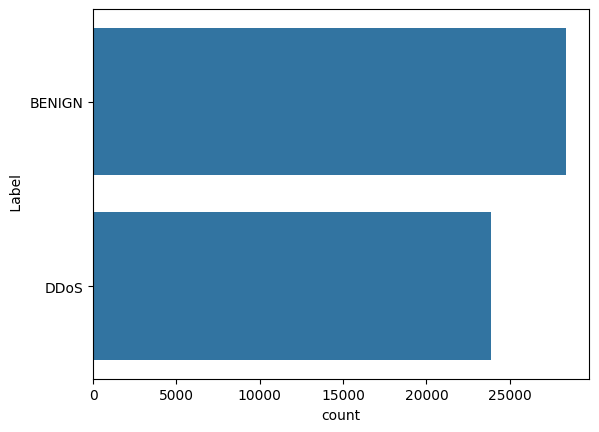

In [ ]:
sns.countplot(df[' Label']);

# Data preprocessing

In [ ]:
df.columns=df.columns.str.strip()

In [ ]:
df.loc[:,'Label'].unique()

array(['BENIGN', 'DDoS', nan], dtype=object)

#Column with Null Values

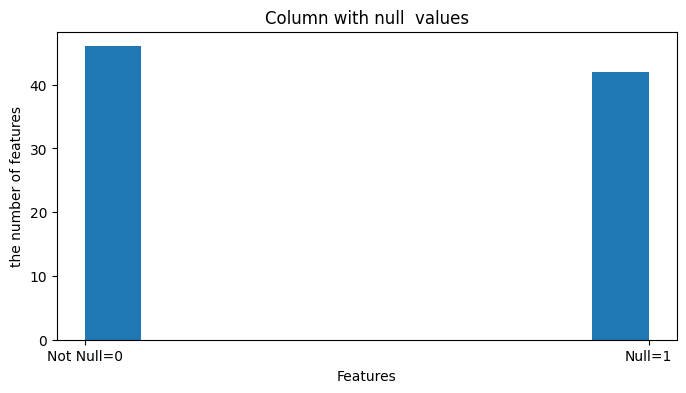

In [ ]:
import matplotlib.pyplot as plt
plt.figure(1,figsize=(8,4))
plt.hist(df.isna().sum())
plt.xticks([0,1],labels=['Not Null=0','Null=1'])
plt.title("Column with null  values")
plt.xlabel("Features")
plt.ylabel("the number of features")
plt.show()

# Plotting Null Values

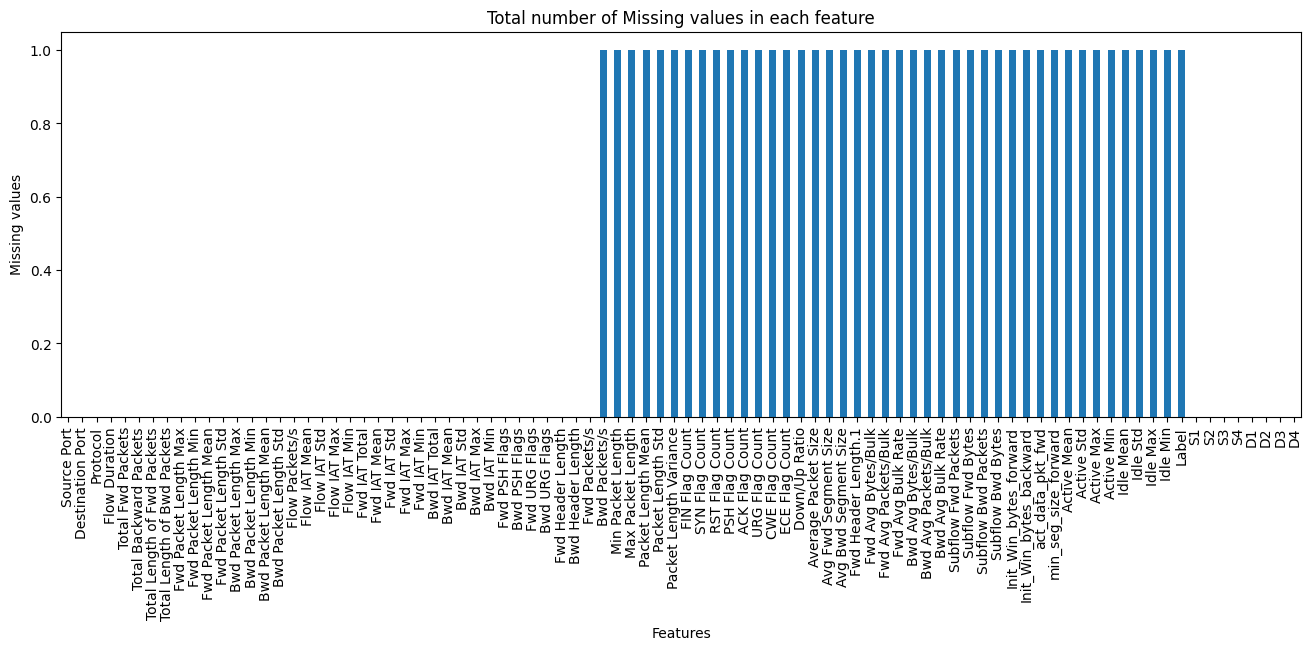

In [ ]:
def plotMissingValues (dataframe):
  missing_values = dataframe.isnull().sum()
  fig = plt.figure(figsize=(16, 5))
  missing_values.plot(kind='bar')
  plt.xlabel("Features")
  plt.ylabel("Missing values")
  plt.title("Total number of Missing values in each feature")
  plt.show()


plotMissingValues(df)

In [ ]:
data_f=df.dropna()
import matplotlib.pyplot as plt

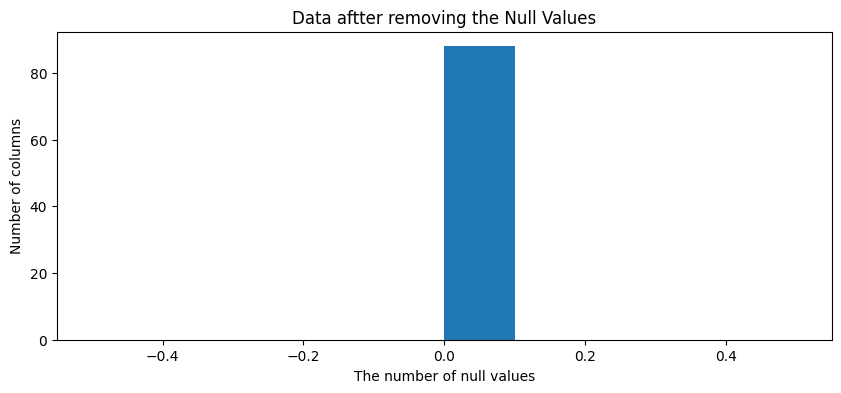

In [ ]:
#Checking the null values in the dataset.
plt.figure(1, figsize=( 10,4))
plt.hist(data_f.isna().sum())
# Set the title and axis Labels
plt.title('Data aftter removing the Null Values')
plt.xlabel('The number of null values')
plt.ylabel('Number of columns')
#Show the plot
plt.show()

In [ ]:
pd.set_option('use_inf_as_na',True)
null_values=data_f.isnull().sum()

In [ ]:
(data_f.dtypes=='object')

Source Port          False
Destination Port     False
Protocol             False
Flow Duration        False
Total Fwd Packets    False
                     ...  
S4                    True
D1                    True
D2                    True
D3                    True
D4                    True
Length: 88, dtype: bool

In [ ]:
data_f['Label']=data_f['Label'].map({'BENIGN':0,'DDoS':1})

<ipython-input-19-feb7a6c81be4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_f['Label']=data_f['Label'].map({'BENIGN':0,'DDoS':1})


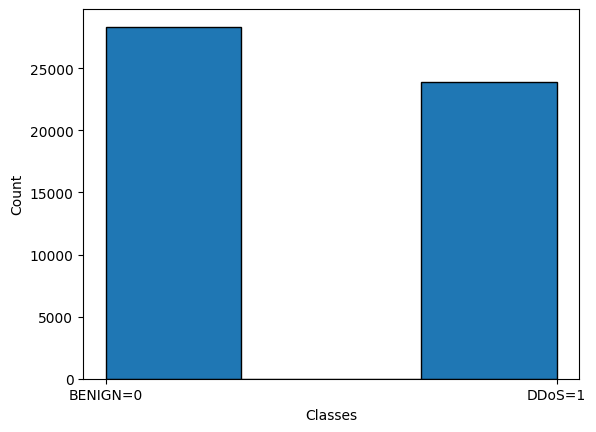

In [ ]:
# Print the DataFrame
plt.hist(data_f['Label'], bins = [0, 0.3,0.7,1], edgecolor='black')
plt.xticks([0, 1], labels=['BENIGN=0', 'DDoS=1'])
plt.xlabel("Classes")
plt.ylabel("Count")
plt.show()


# Data Exploring

In [ ]:
df.describe()

Source Port  Destination Port      Protocol  Flow Duration  \
count  52211.000000      52211.000000  52211.000000   5.221100e+04   
mean   37351.297696       6515.227059      8.509069   1.375516e+07   
std    22434.573020      16703.352304      4.619514   2.843567e+07   
min        0.000000          0.000000      0.000000   0.000000e+00   
25%    15983.000000         80.000000      6.000000   4.068050e+04   
50%    50804.000000         80.000000      6.000000   7.854710e+05   
75%    55331.000000        389.000000      6.000000   7.140024e+06   
max    65534.000000      61538.000000     17.000000   1.199981e+08   

       Total Fwd Packets  Total Backward Packets  Total Length of Fwd Packets  \
count       52211.000000            52211.000000                 52211.000000   
mean            5.380878                5.456226                   715.521959   
std            18.586762               26.166839                  3400.171724   
min             1.000000                0.000000                     0.000000   
25%             2.000000                1.000000                    26.000000   
50%             3.000000                4.000000                    30.000000   
75%             5.000000                5.000000                    74.000000   
max          1681.000000             2942.000000                120783.000000   

       Total Length of Bwd Packets  Fwd Packet Length Max  \
count                 5.221100e+04           52211.000000   
mean                  6.856940e+03             346.600486   
std                   4.613051e+04            1395.344615   
min                   0.000000e+00               0.000000   
25%                   6.000000e+00               6.000000   
50%                   2.020000e+02              20.000000   
75%                   1.160100e+04              43.000000   
max                   4.991419e+06           11680.000000   

       Fwd Packet Length Min  ...  act_data_pkt_fwd  min_seg_size_forward  \
count            52211.00000  ...      52210.000000          52210.000000   
mean                24.00565  ...          3.534993             22.497376   
std                131.68196  ...         14.292914              5.193751   
min                  0.00000  ...          0.000000              0.000000   
25%                  0.00000  ...          1.000000             20.000000   
50%                  6.00000  ...          2.000000             20.000000   
75%                  6.00000  ...          4.000000             20.000000   
max               1472.00000  ...       1680.000000             52.000000   

        Active Mean    Active Std    Active Max    Active Min     Idle Mean  \
count  5.221000e+04  5.221000e+04  5.221000e+04  5.221000e+04  5.221000e+04   
mean   1.557840e+05  2.463324e+04  2.000023e+05  1.417096e+05  7.675237e+06   
std    8.817137e+05  3.416382e+05  1.094033e+06  8.481647e+05  1.748728e+07   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
50%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
75%    9.930000e+02  0.000000e+00  9.930000e+02  9.930000e+02  6.685236e+06   
max    1.000000e+08  3.950000e+07  1.000000e+08  1.000000e+08  1.200000e+08   

           Idle Std      Idle Max      Idle Min  
count  5.221000e+04  5.221000e+04  5.221000e+04  
mean   2.485599e+06  9.436773e+06  5.897680e+06  
std    9.517435e+06  2.122584e+07  1.587205e+07  
min    0.000000e+00  0.000000e+00  0.000000e+00  
25%    0.000000e+00  0.000000e+00  0.000000e+00  
50%    0.000000e+00  0.000000e+00  0.000000e+00  
75%    0.000000e+00  6.688705e+06  6.004866e+06  
max    6.530000e+07  1.200000e+08  1.200000e+08  

[8 rows x 79 columns]

# Plot the distribution of the features

<ipython-input-22-d25a24c4c99e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_f[col].replace([np.inf, -np.inf], np.nan, inplace=True)


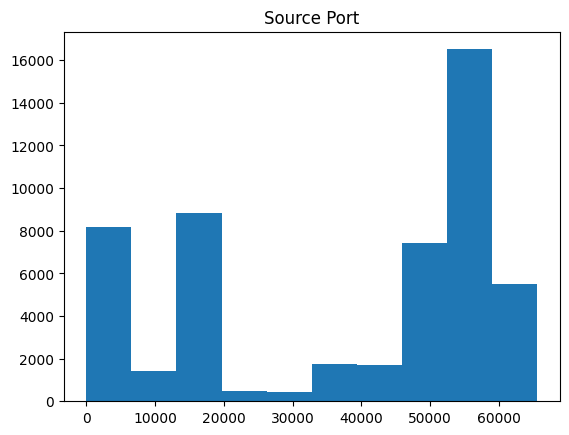

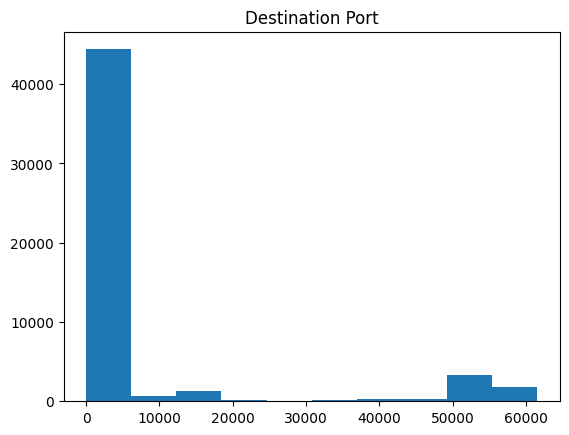

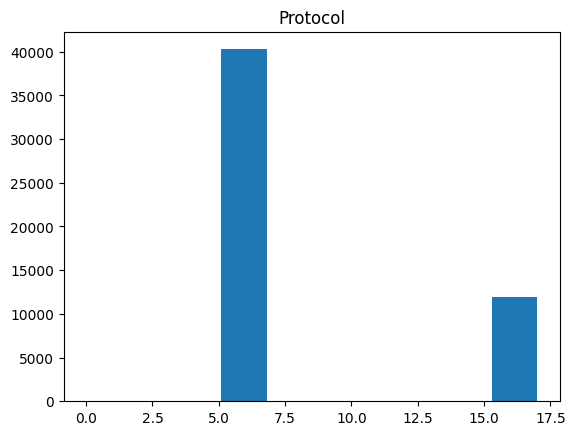

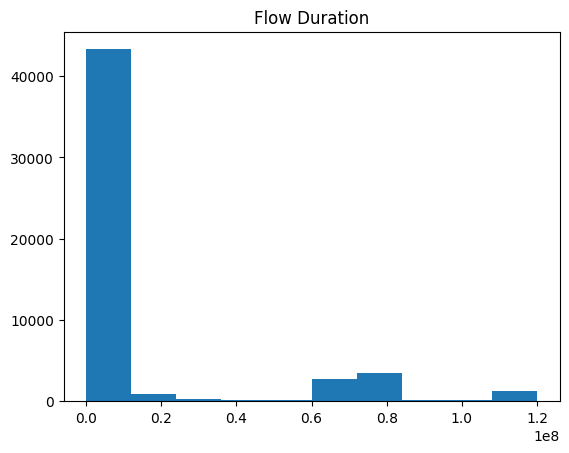

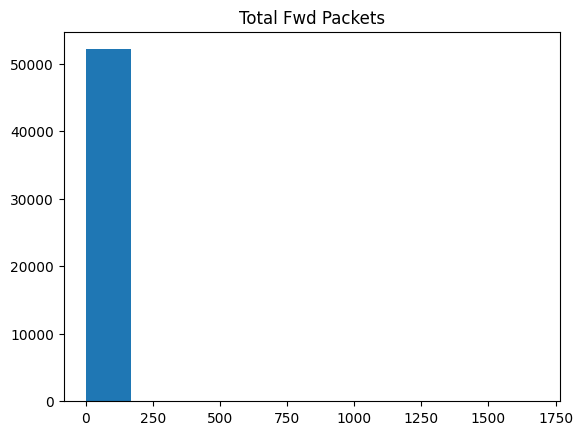

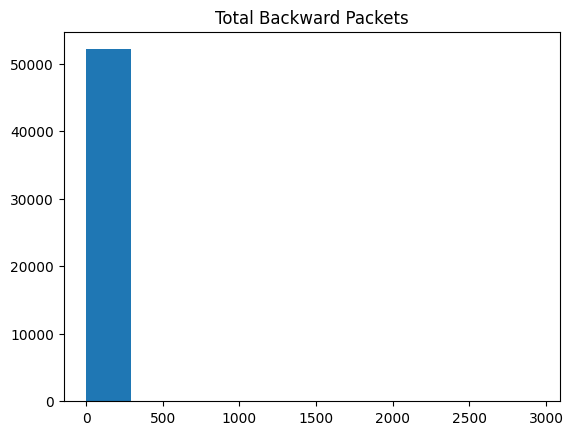

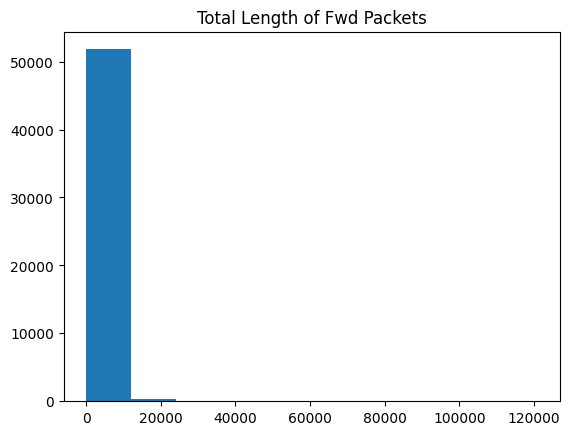

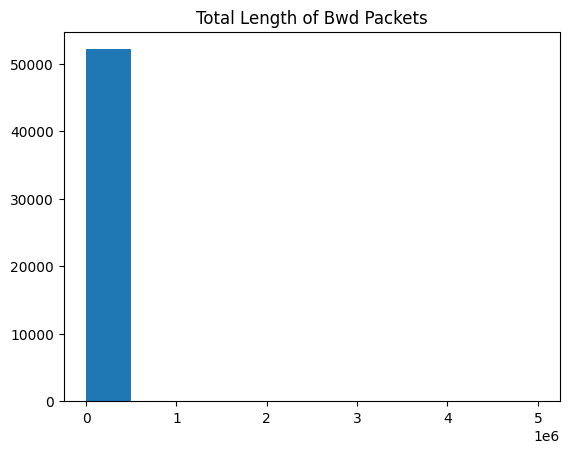

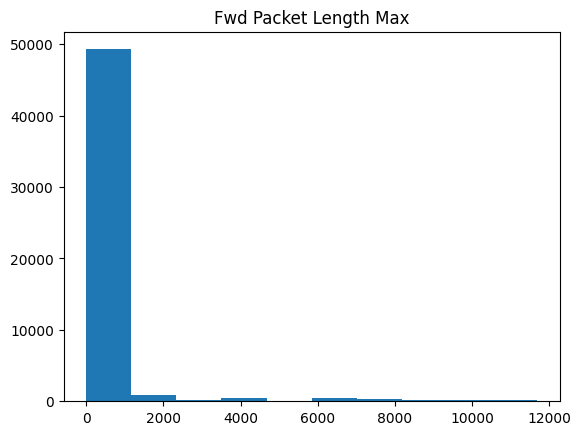

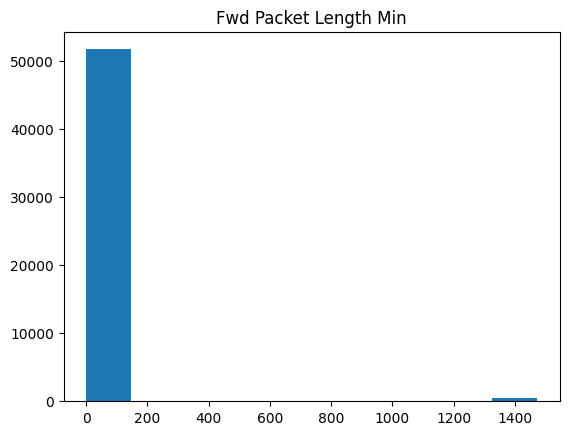

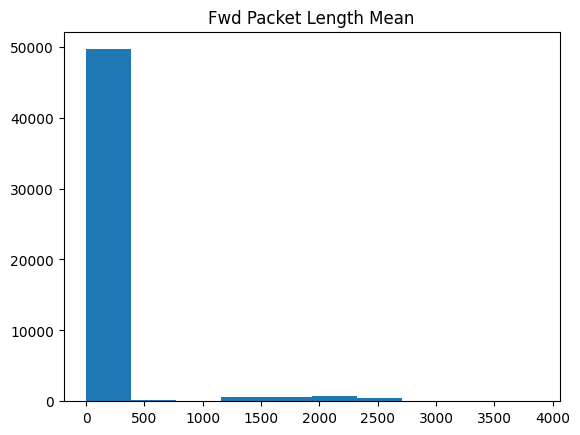

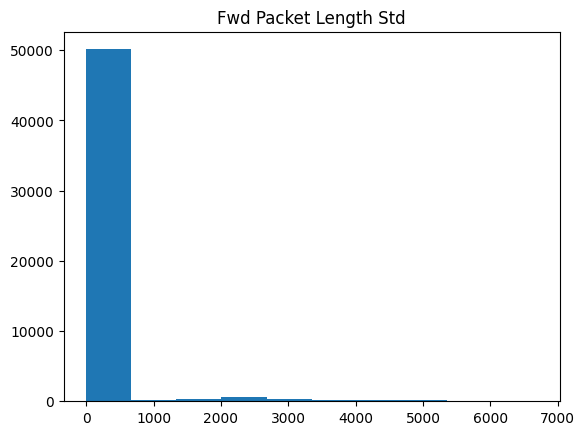

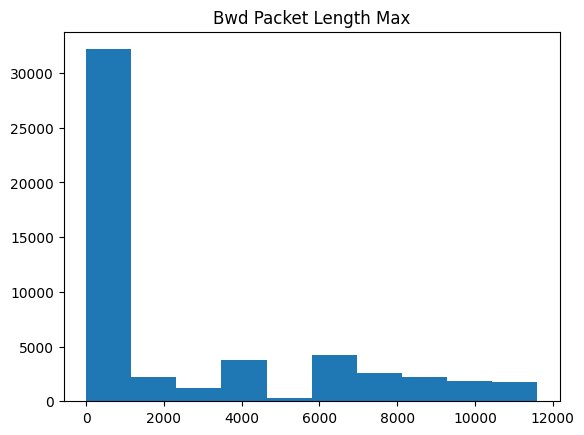

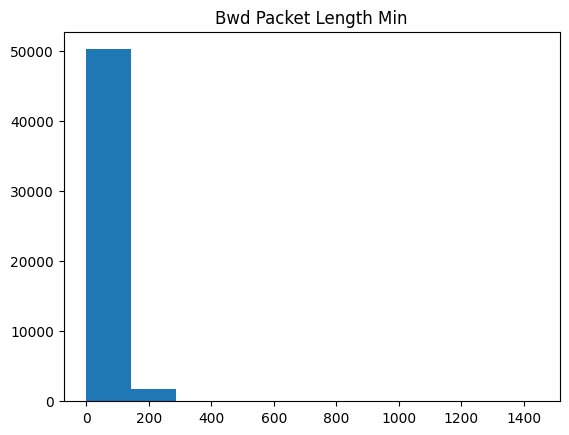

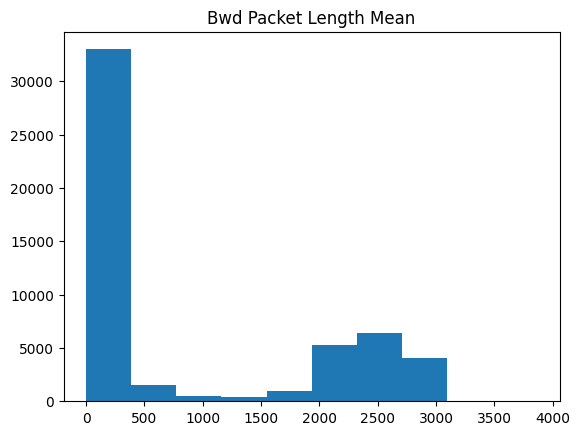

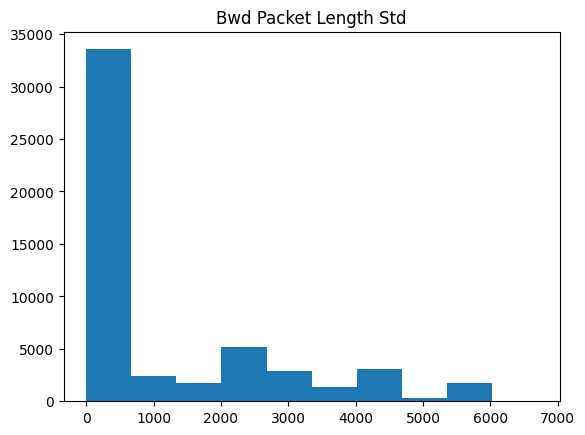

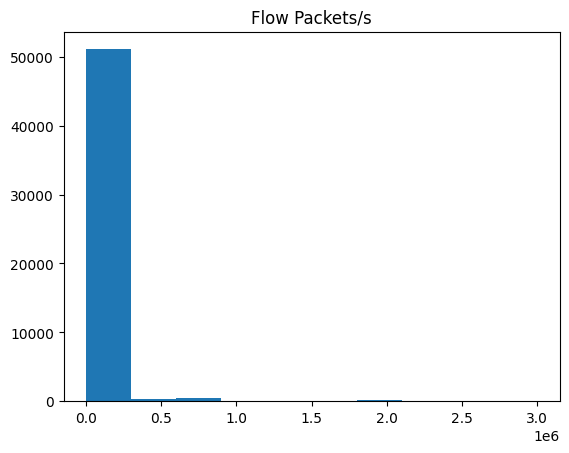

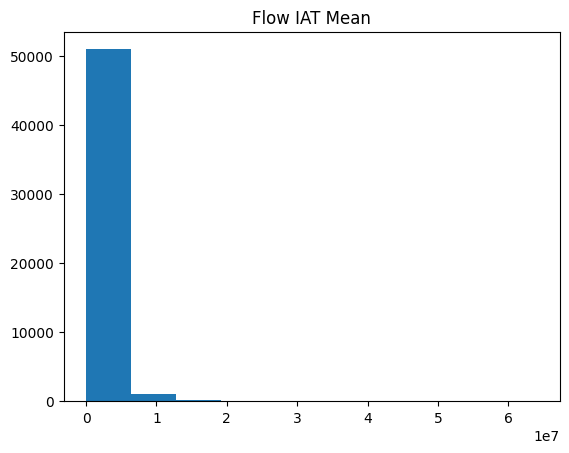

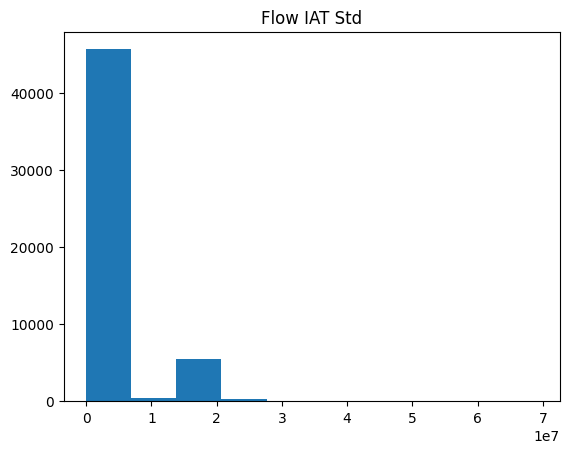

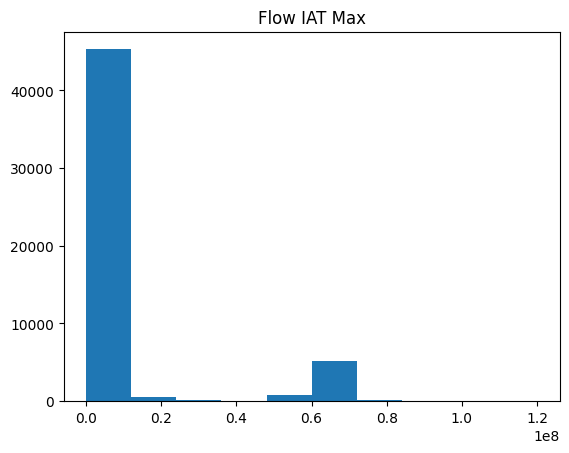

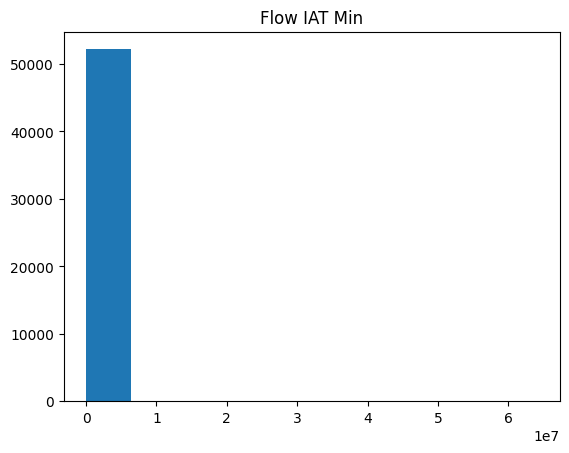

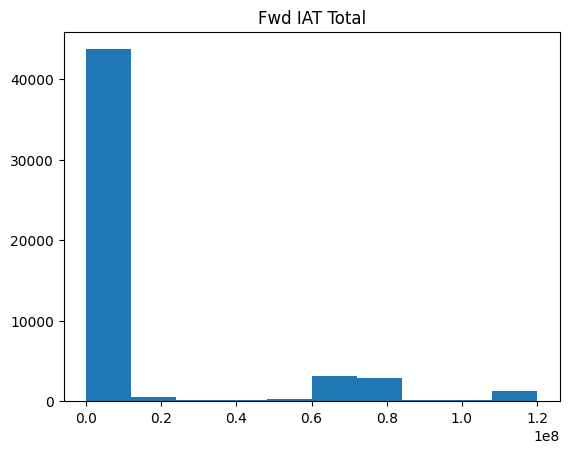

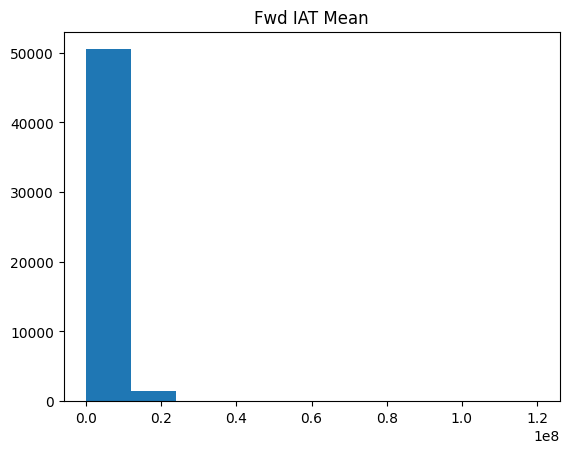

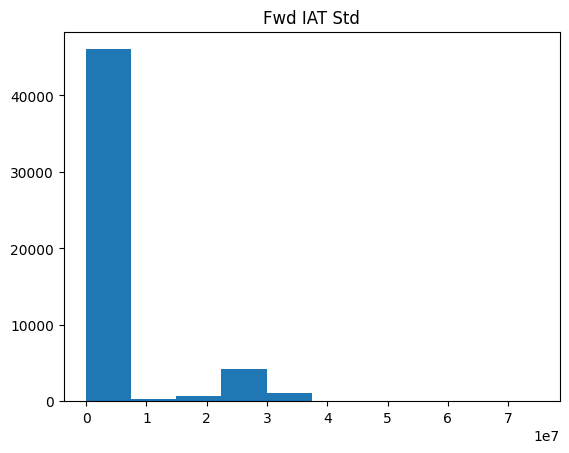

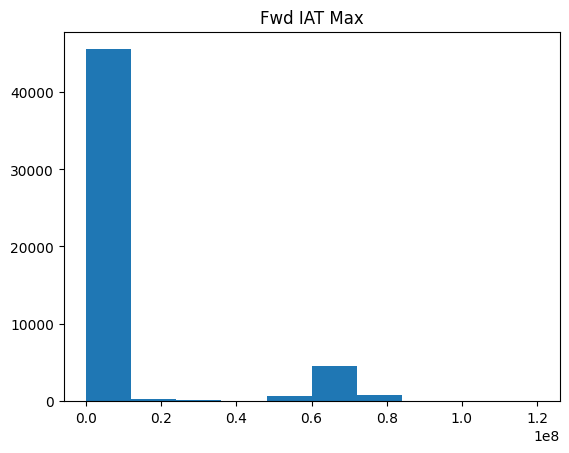

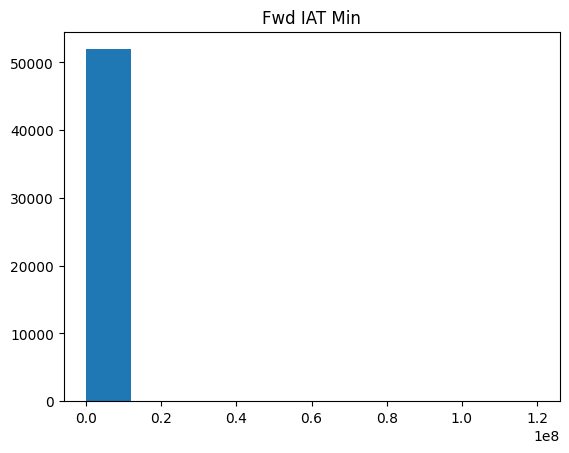

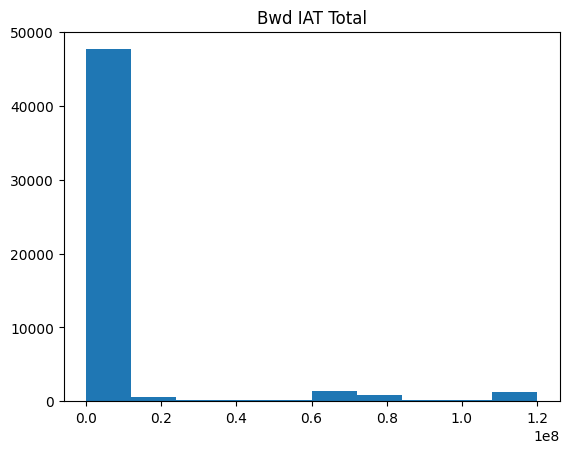

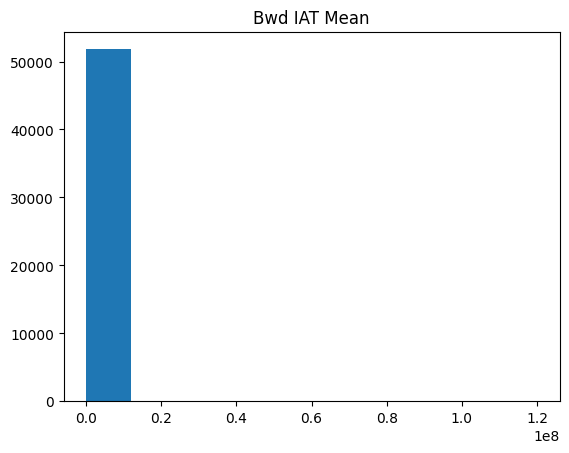

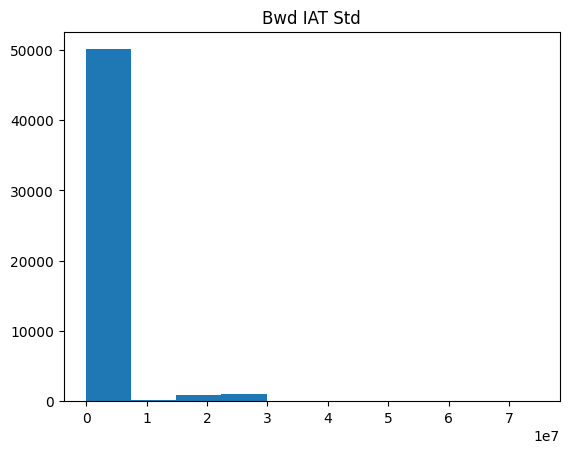

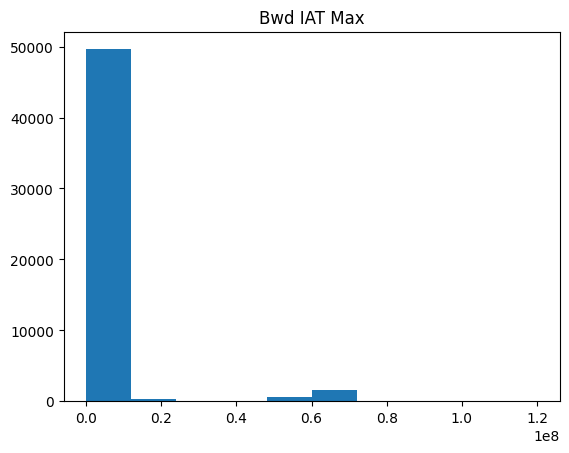

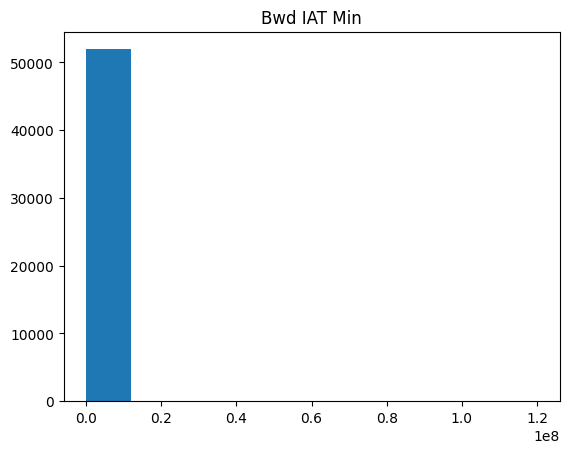

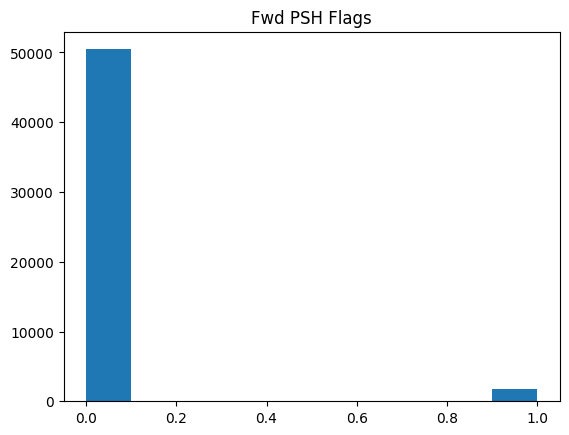

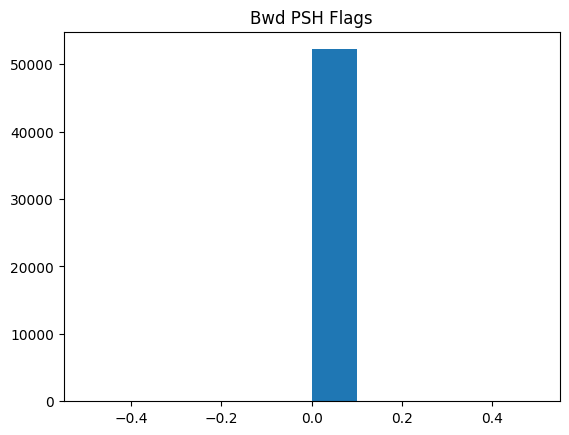

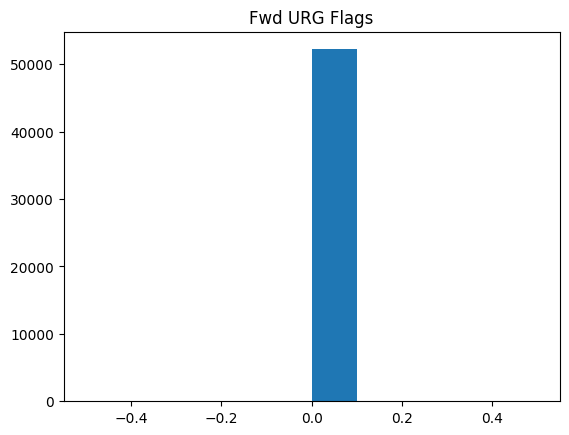

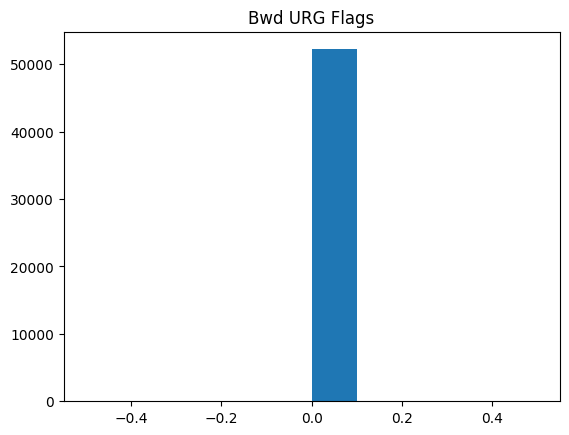

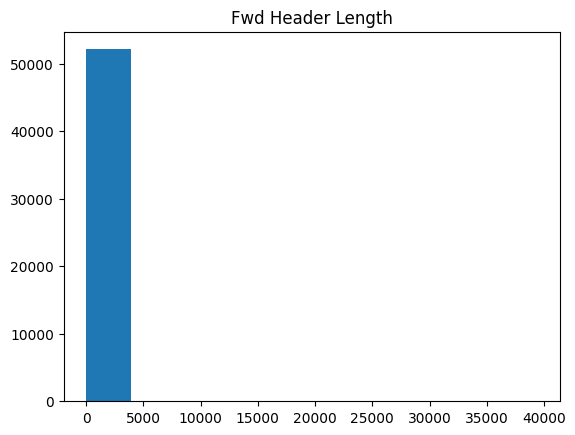

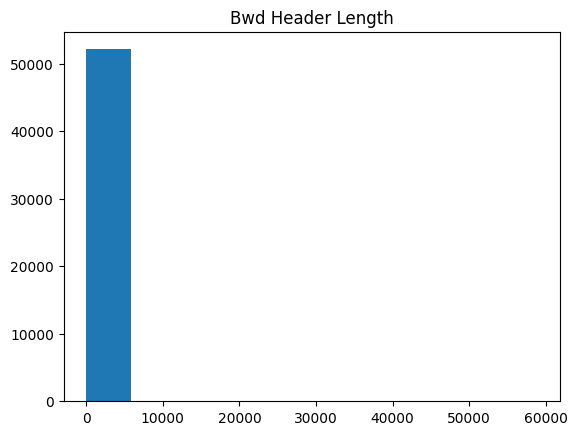

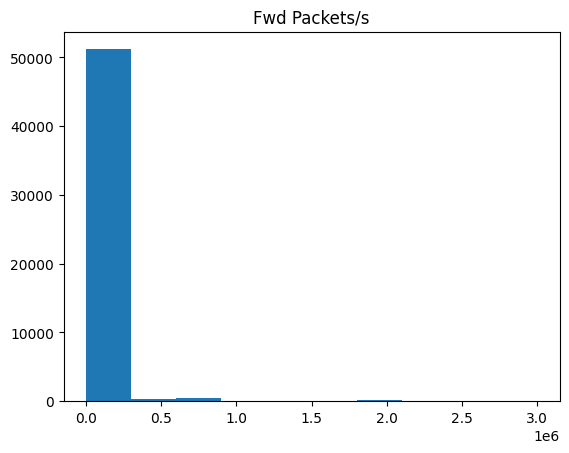

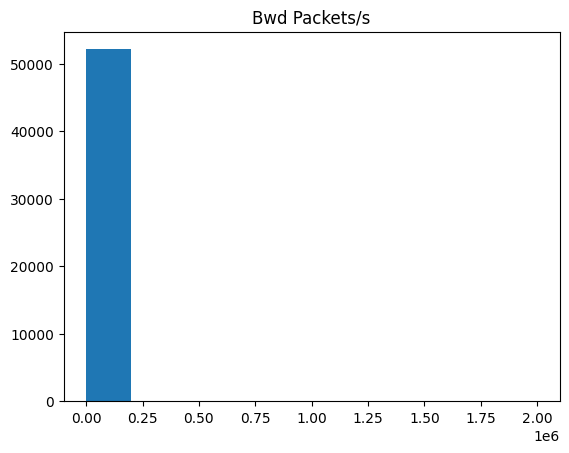

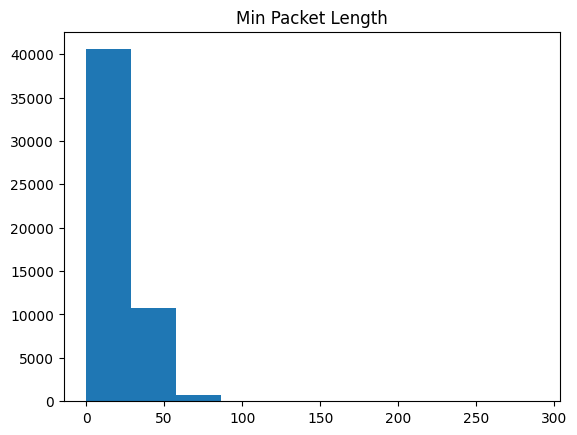

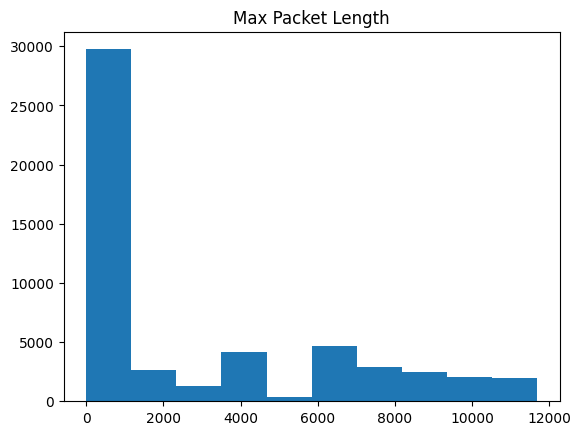

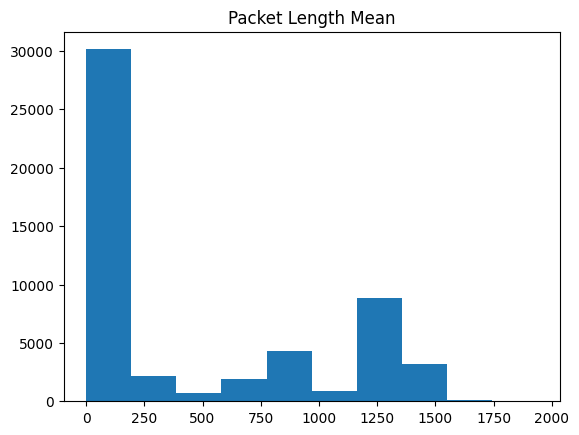

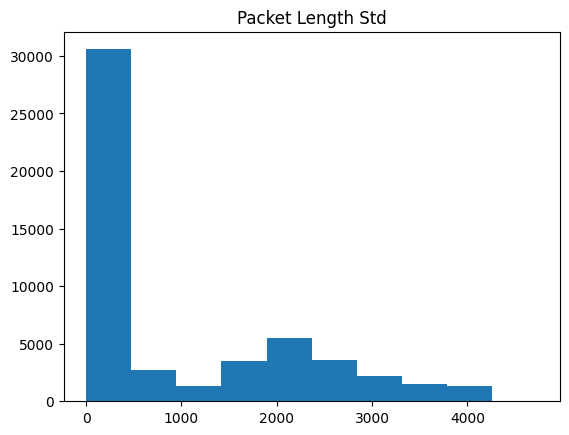

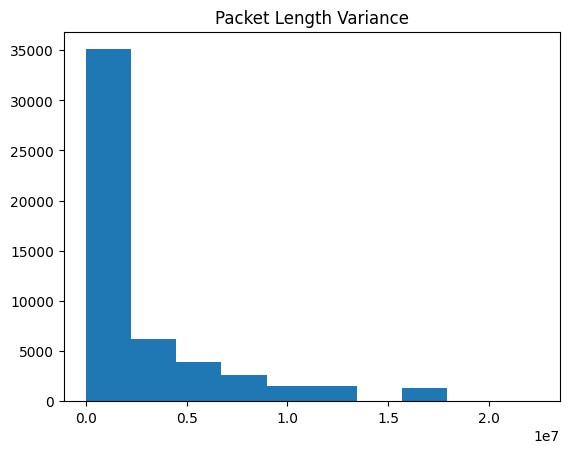

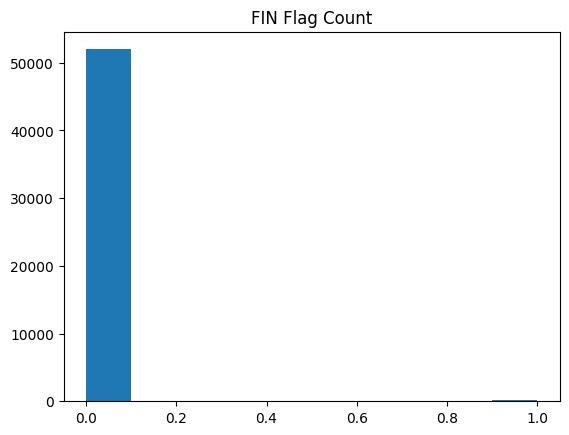

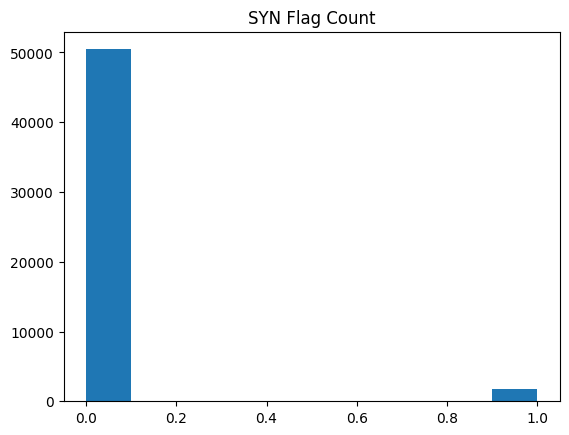

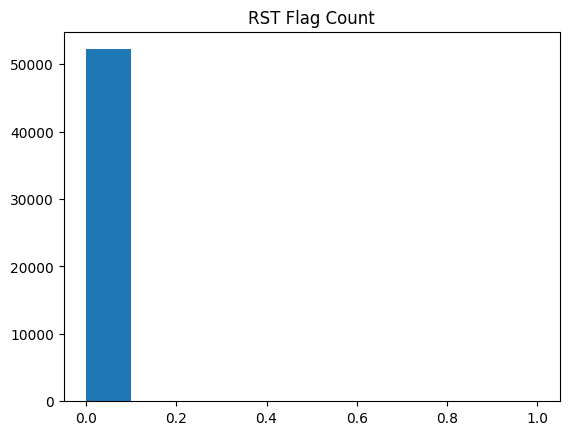

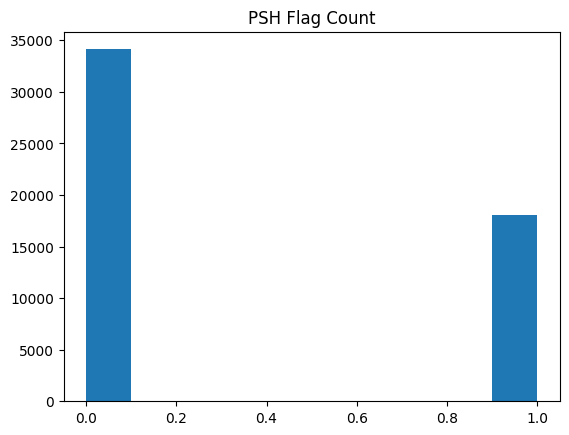

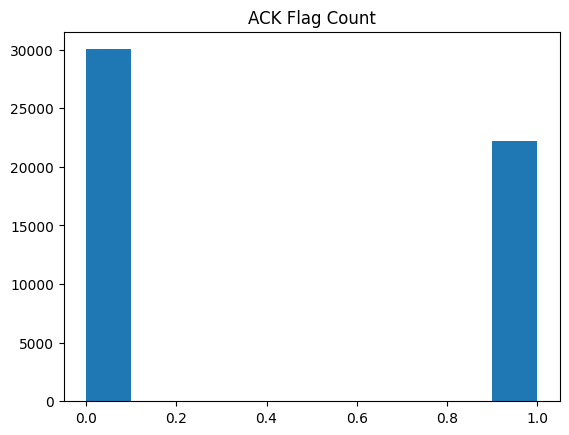

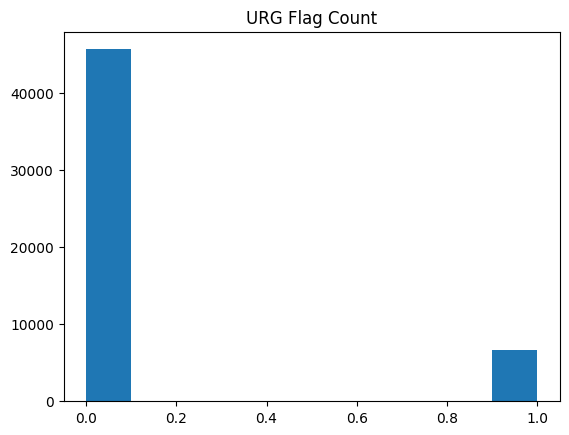

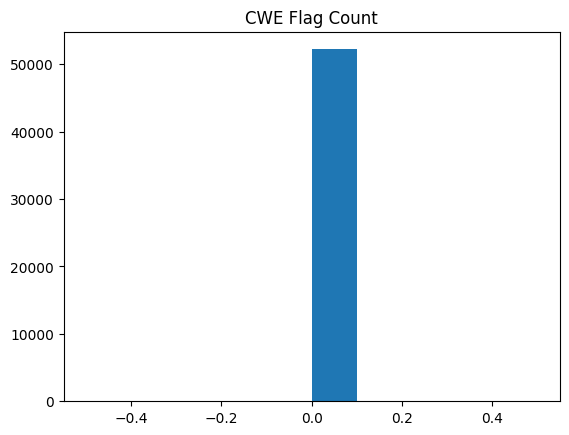

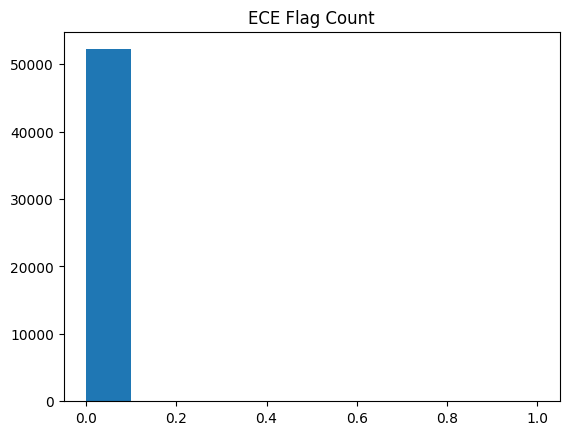

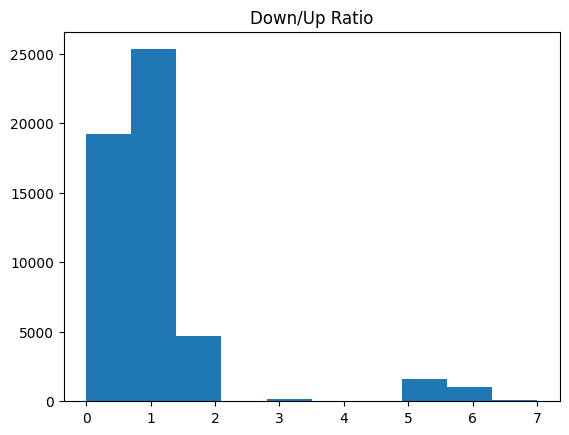

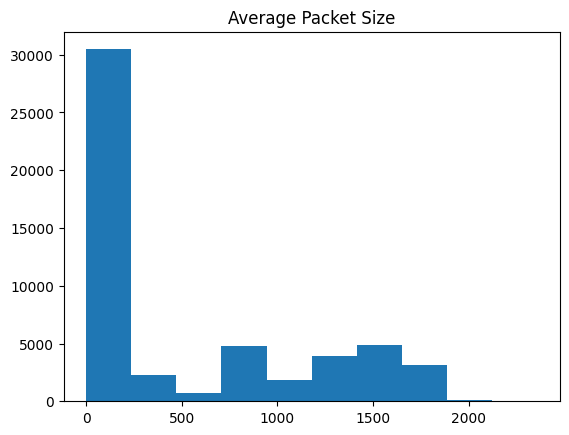

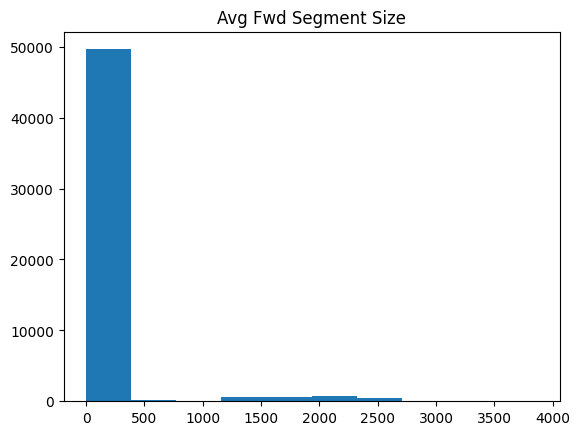

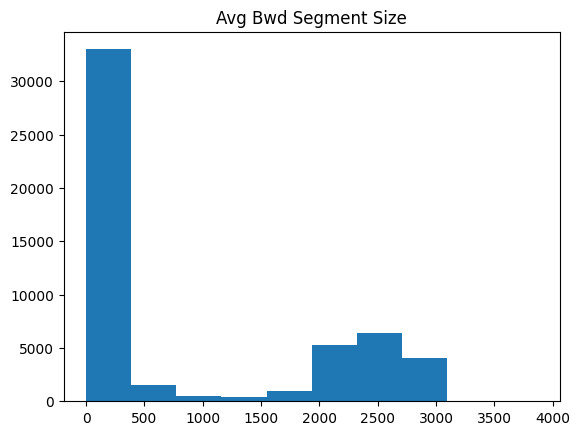

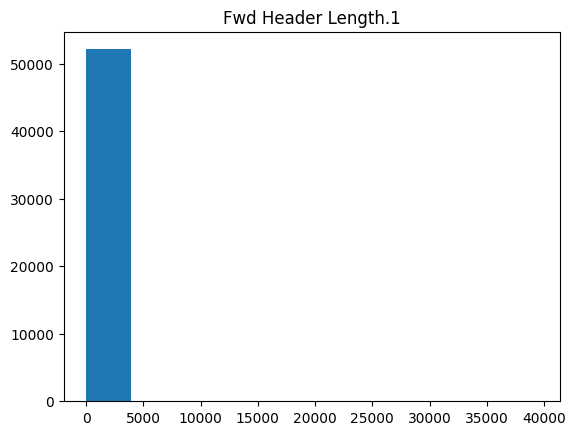

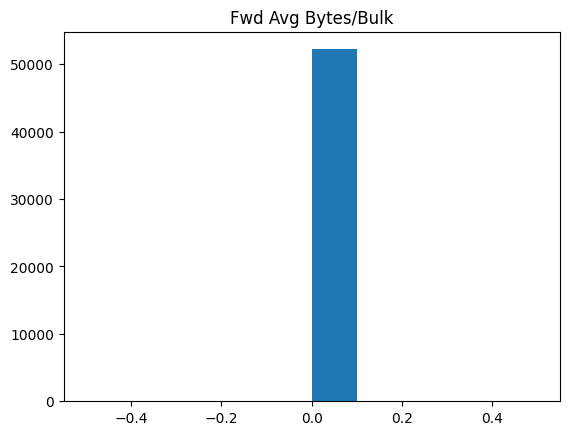

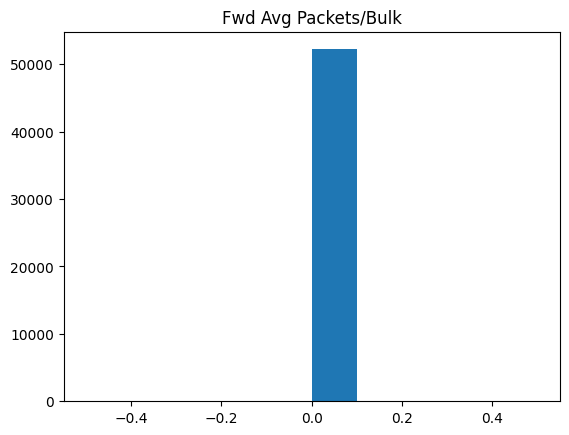

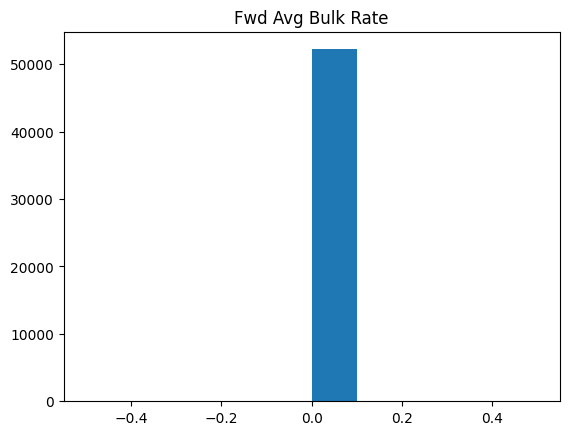

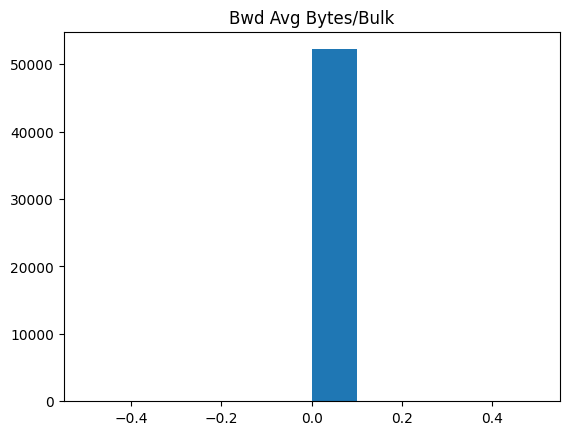

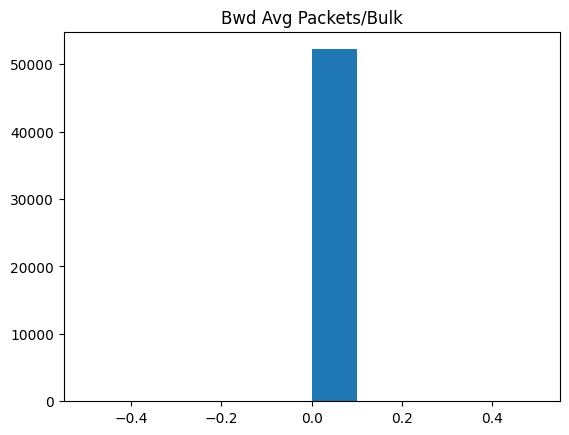

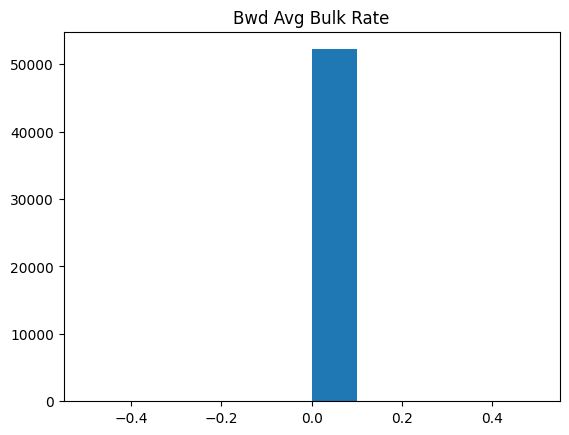

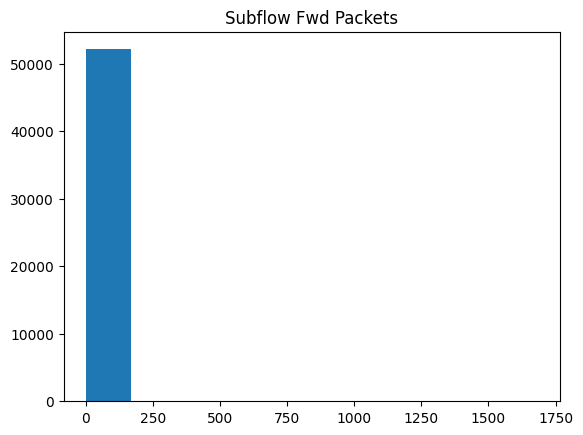

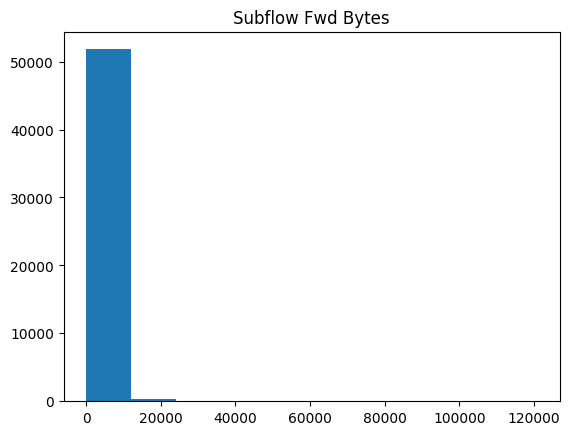

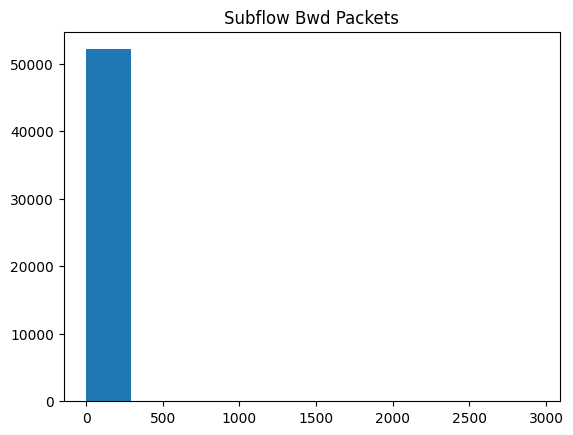

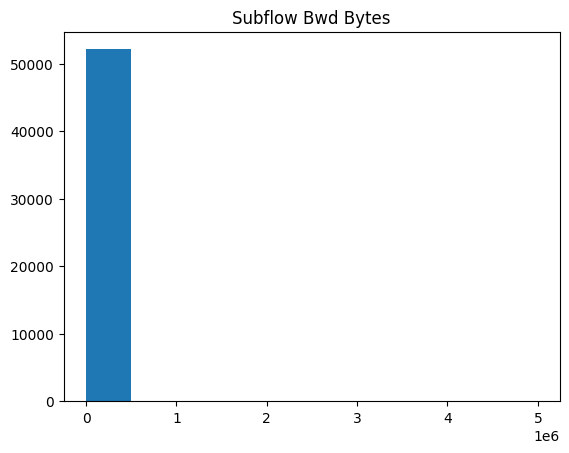

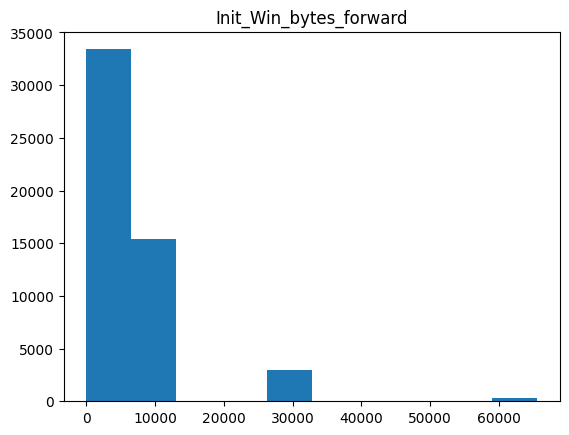

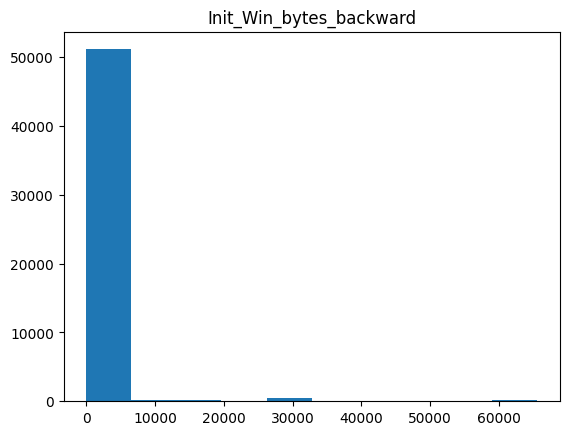

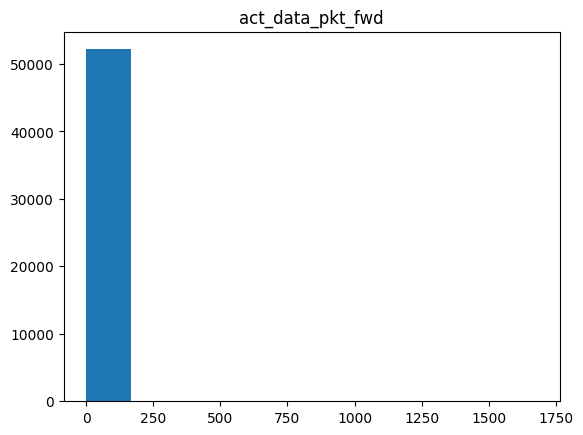

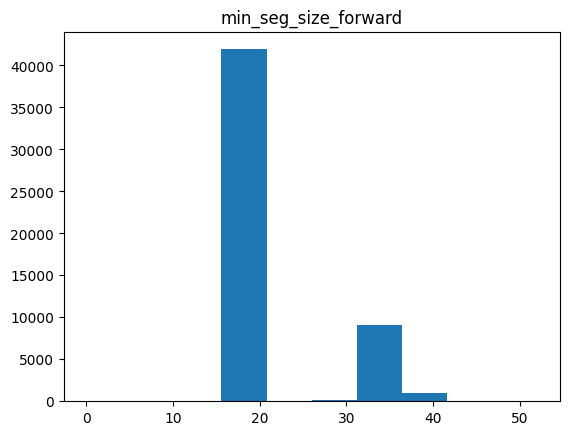

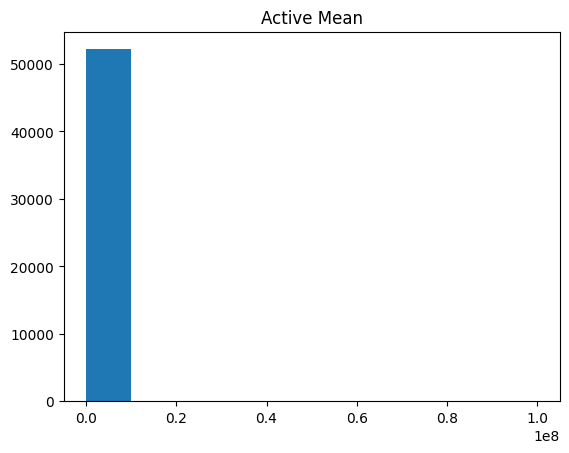

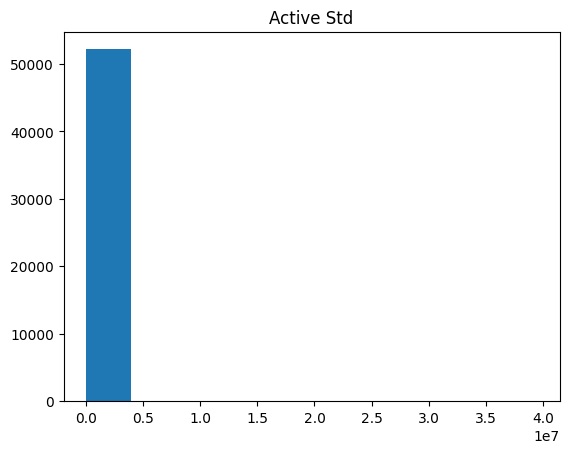

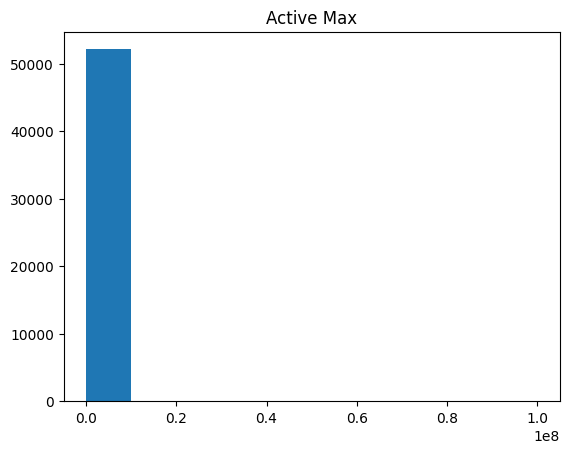

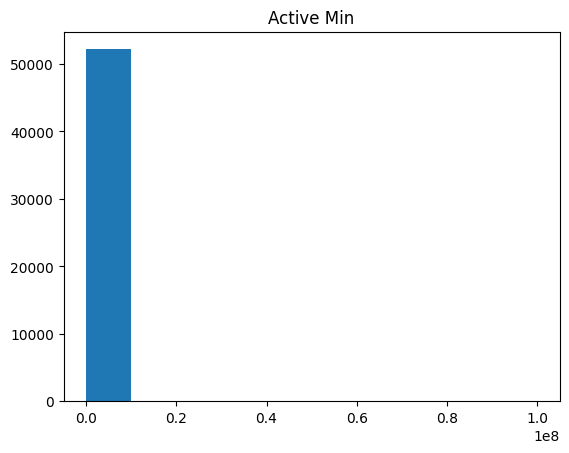

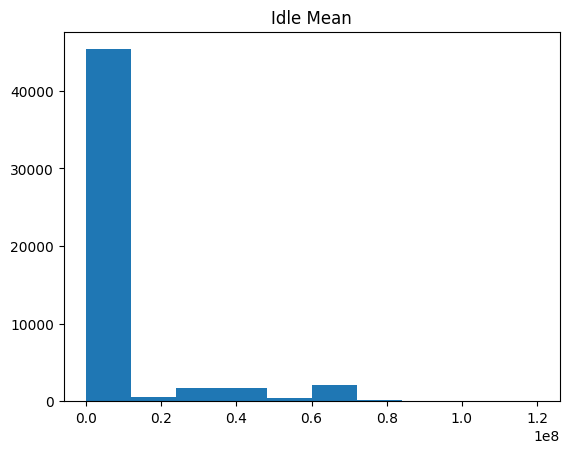

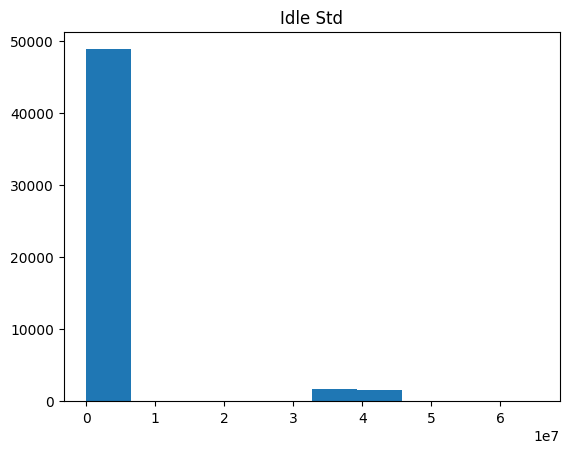

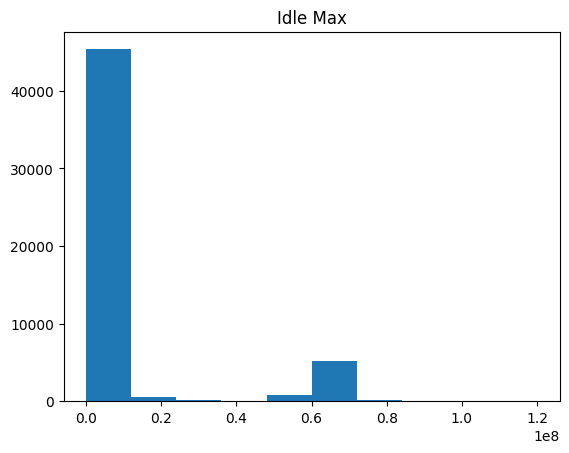

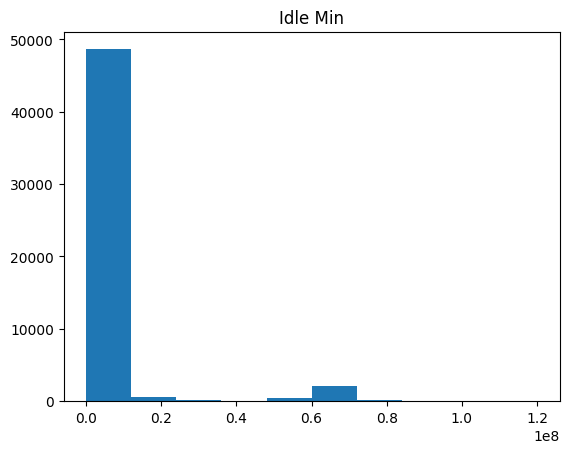

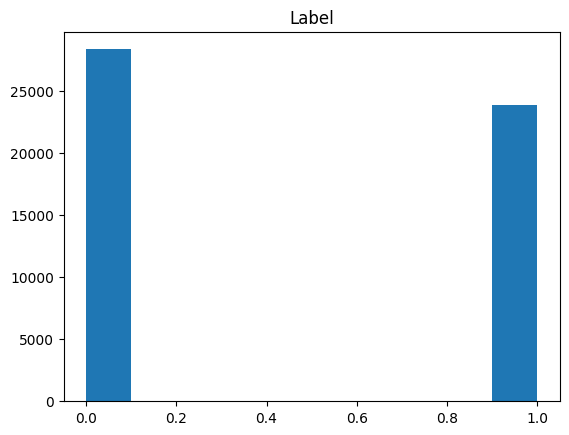

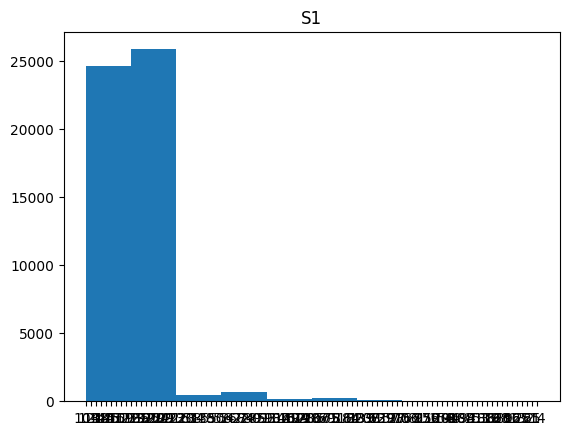

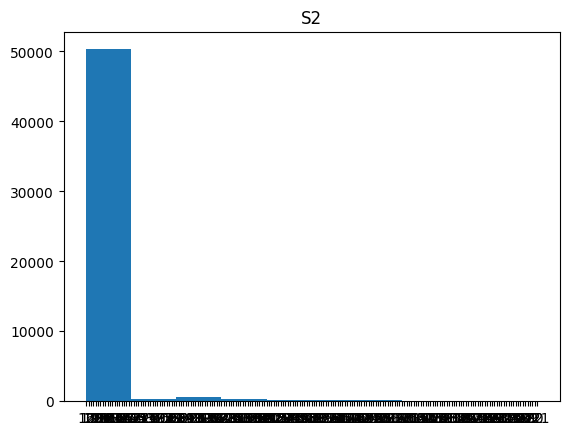

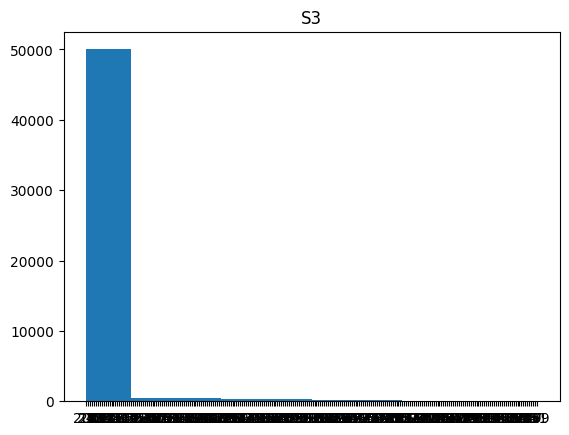

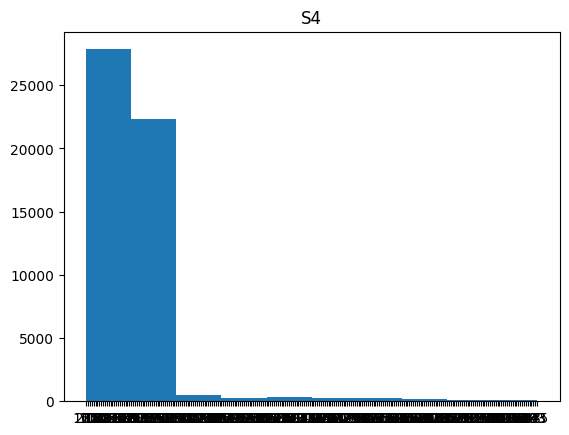

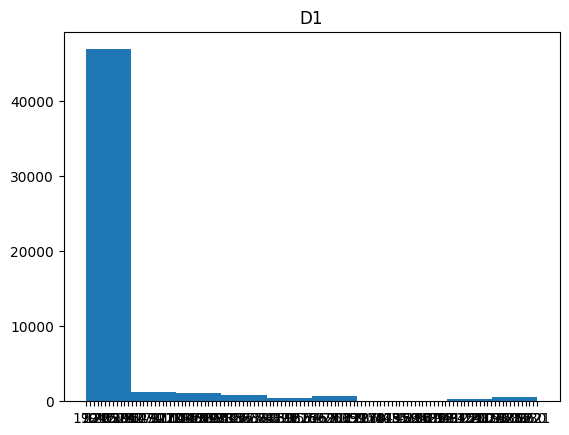

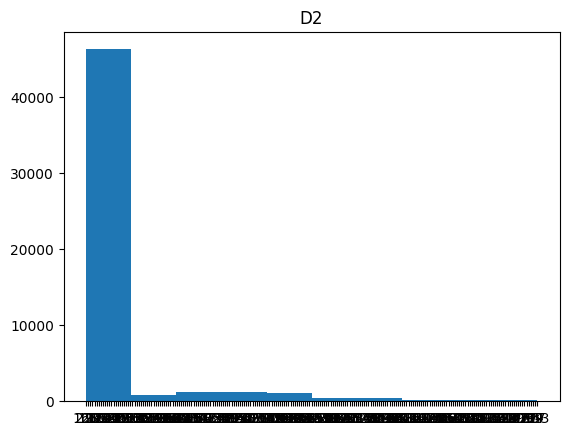

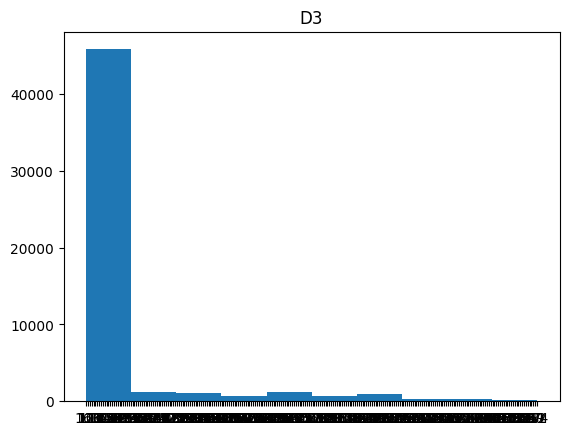

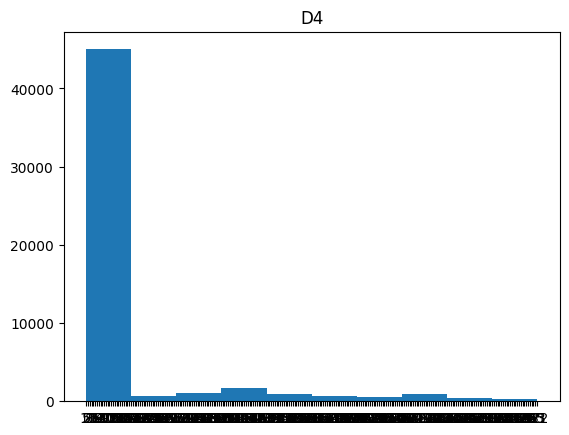

In [ ]:
plt.figure(5)
for col in data_f.columns:
    # Replace infinite values with NaN
    data_f[col].replace([np.inf, -np.inf], np.nan, inplace=True)

    plt.hist(data_f[col])
    plt.title(col)
    plt.show()

# Data Splitting Into Train and Test

In [ ]:
X=data_f.drop('Label',axis=1)
y=data_f['Label']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
print("train dataset size",X_train.shape)
print("test dataset size",X_test.shape)

train dataset size (36547, 87)
test dataset size (15663, 87)


<Axes: >

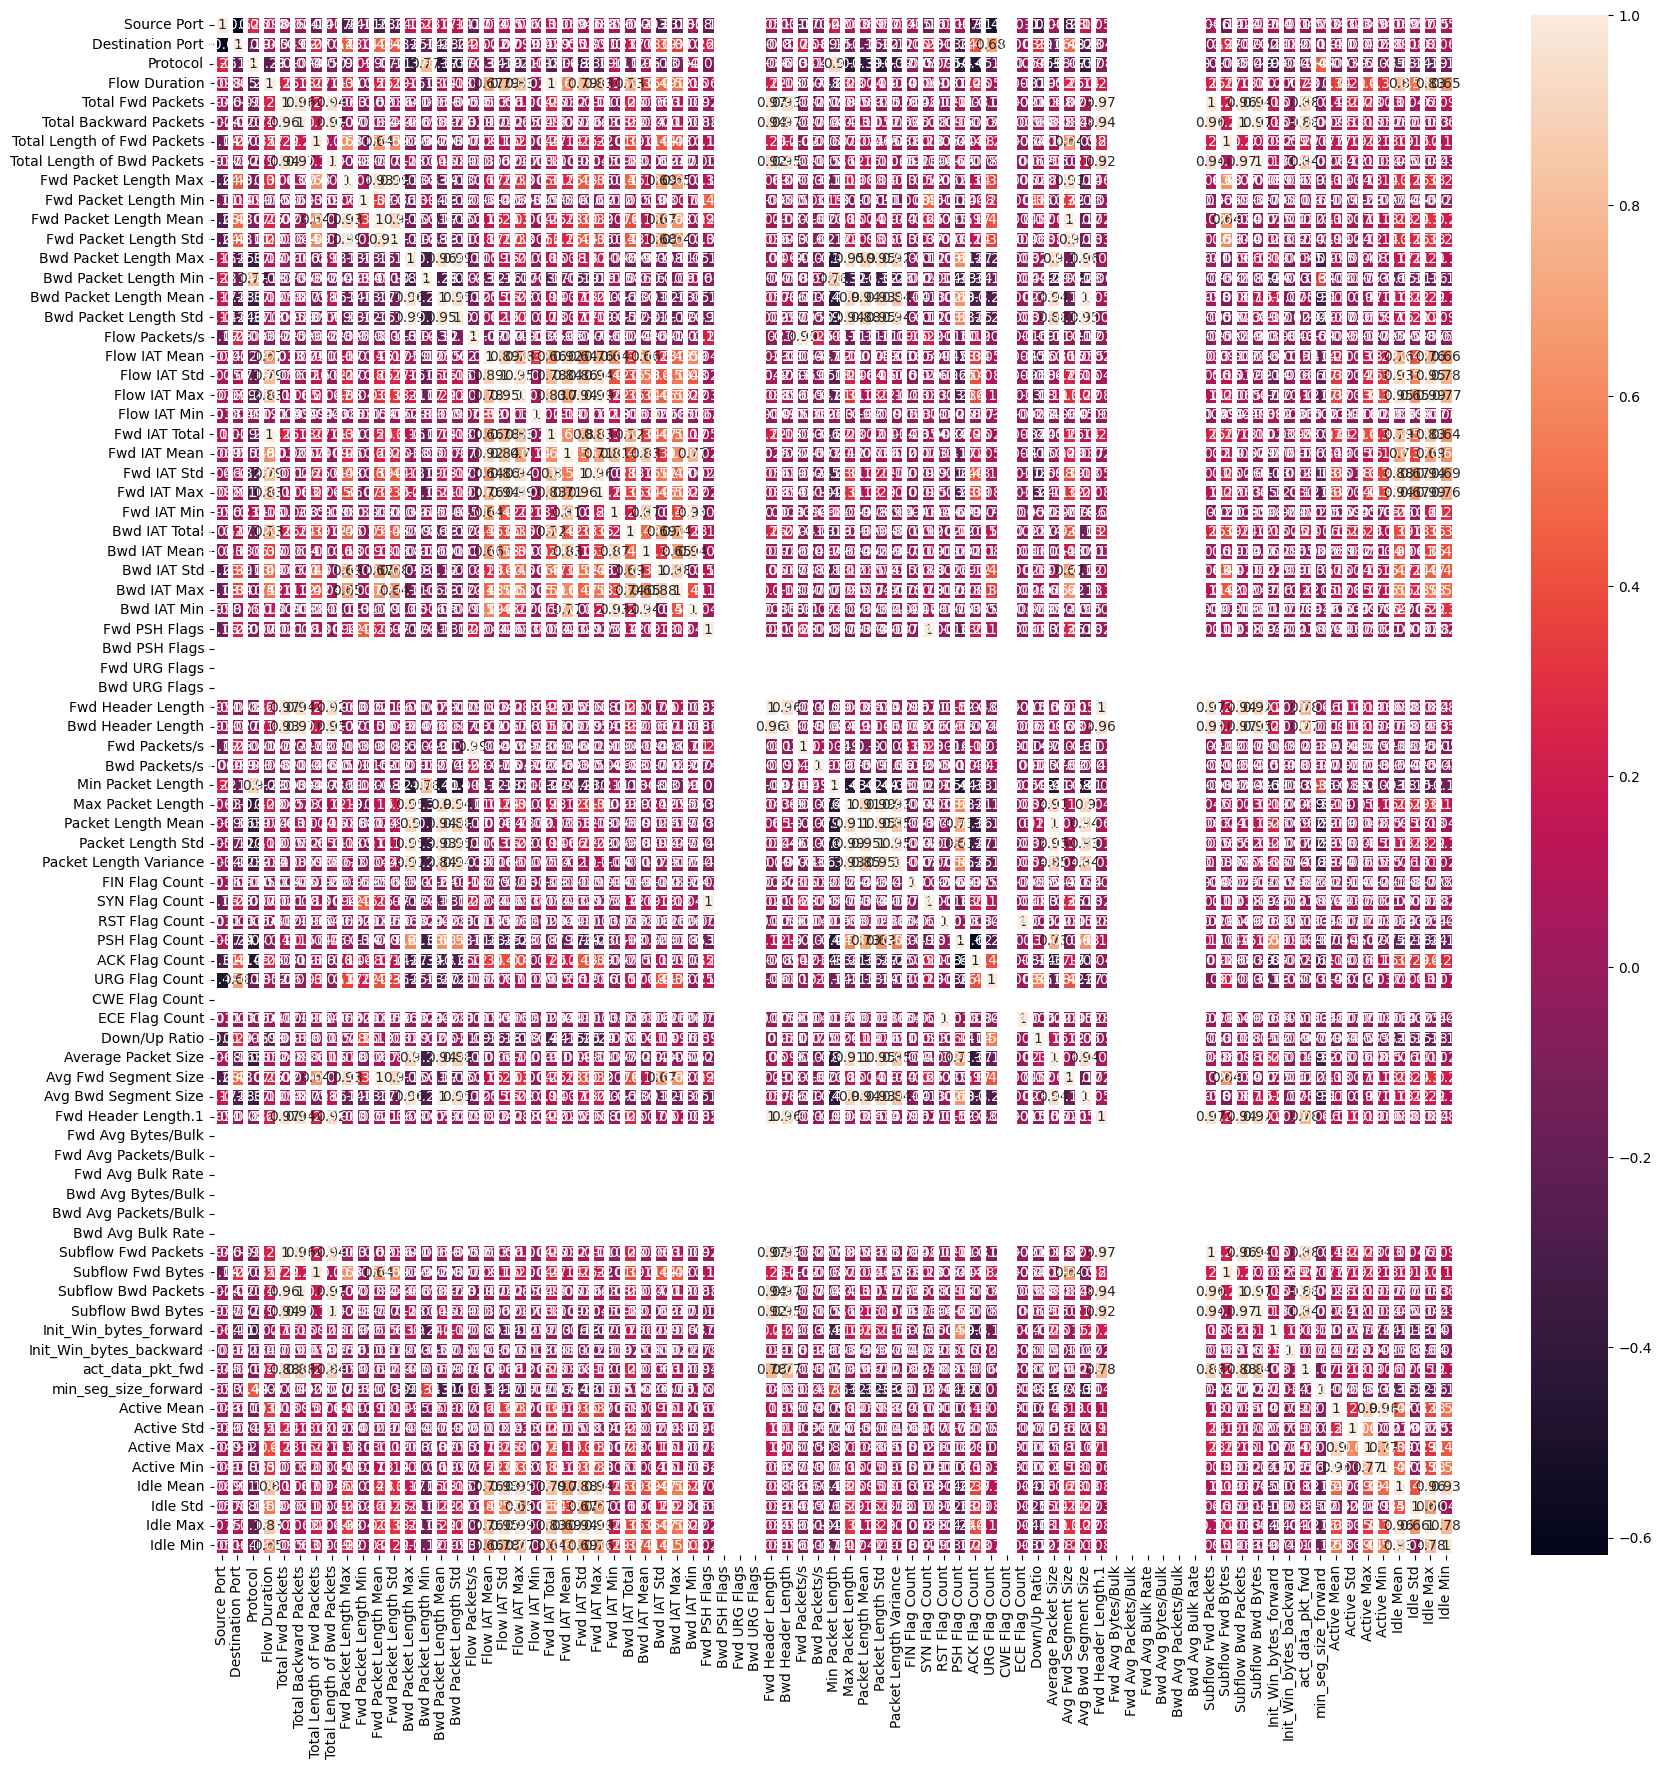

In [ ]:
# Select only numeric columns before calculating correlation
numeric_df = df.select_dtypes(include=['number'])

corr = numeric_df.corr()
fig,ax= plt.subplots(figsize=(20,20))
sns.heatmap(corr,annot=True,linewidth=2.5,ax=ax)

In [ ]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,confusion_matrix,classification_report

#Traing The Model

# KNeighbors Classifier

In [ ]:
# Train the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)

# Impute missing values in X_train using the same imputer
X_train_imputed = imputer.transform(X_train)
knn_model.fit(X_train_imputed, y_train)

KNeighborsClassifier()

# Model Evaluation

In [ ]:
# Predict on the test data after imputing missing values in X_test
X_test_imputed = imputer.transform(X_test)
y_pred = knn_model.predict(X_test_imputed)

In [ ]:
acc_knn=accuracy_score(y_pred,y_test)
print("Accuracy =",acc_knn)
print(classification_report(y_pred,y_test))

Accuracy = 0.9951029717582344
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      7721
           1       1.00      0.99      0.99      7186

    accuracy                           1.00     14907
   macro avg       1.00      1.00      1.00     14907
weighted avg       1.00      1.00      1.00     14907



# Confusion Matrix

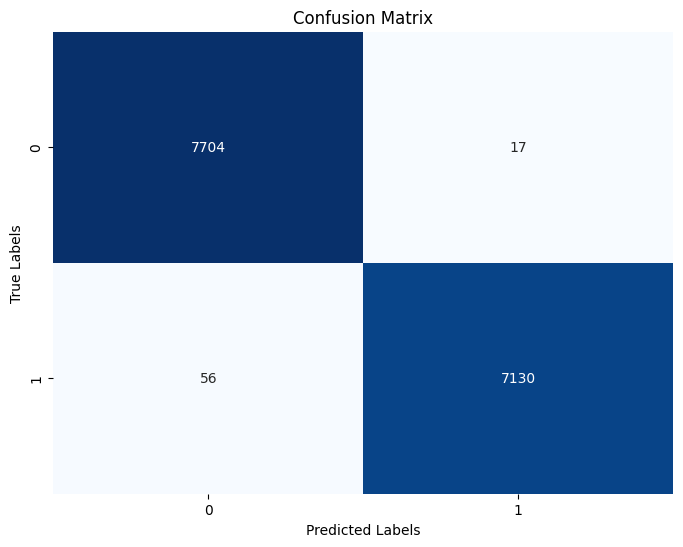

In [ ]:
con  = confusion_matrix(y_pred,y_test)
plt.figure(figsize=(8, 6))
sns.heatmap(con, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# ROC Curve of KNN

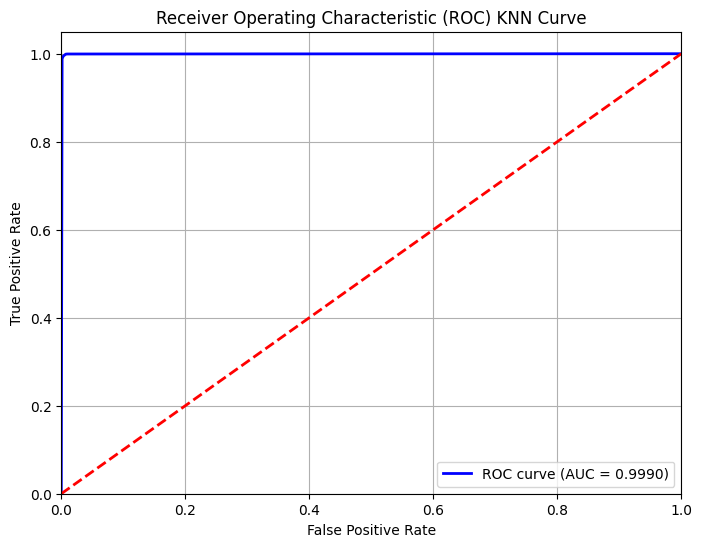

In [ ]:
# Generate ROC curve
X_test_imputed = imputer.transform(X_test)
y_pred_prob =knn_model.predict_proba(X_test_imputed)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) KNN Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Logistic Regression

In [ ]:
# Train the logistic regression model
logistic_model = LogisticRegression(max_iter=1000)

# Impute missing values in X_train before fitting the model
X_train_imputed = imputer.transform(X_train)

logistic_model.fit(X_train_imputed, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

# Model Evaluation

In [ ]:
# Predict on the test data after imputing missing values in X_test
X_test_imputed = imputer.transform(X_test)
y_pred = logistic_model.predict(X_test_imputed)

In [ ]:
acc_lg=accuracy_score(y_pred,y_test)
print("Accuracy =",acc_lg)
print(classification_report(y_pred,y_test))

Accuracy = 0.981552290870061
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      7911
           1       0.97      0.99      0.98      6996

    accuracy                           0.98     14907
   macro avg       0.98      0.98      0.98     14907
weighted avg       0.98      0.98      0.98     14907



# Confusion Matrix

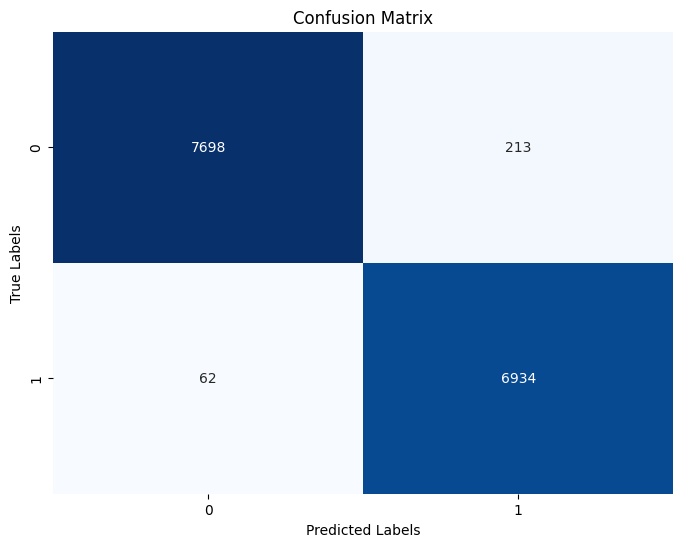

In [ ]:
con  = confusion_matrix(y_pred,y_test)
plt.figure(figsize=(8, 6))
sns.heatmap(con, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# ROC Curve of Logistic Regression

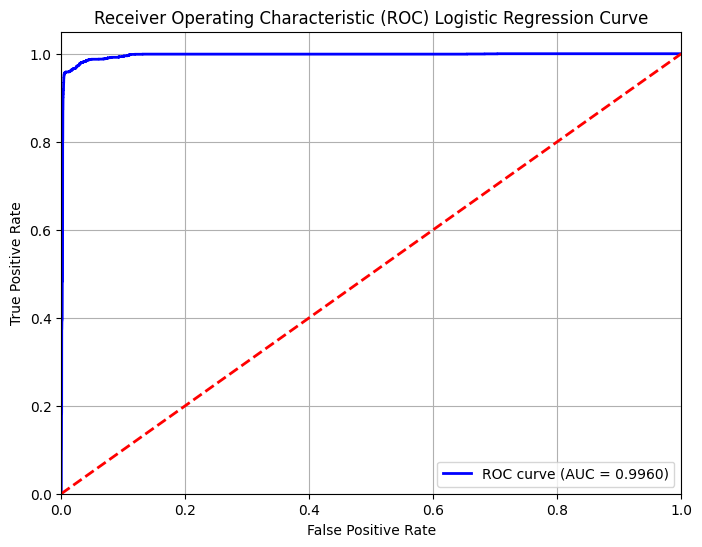

In [ ]:
# Generate ROC curve
X_test_imputed = imputer.transform(X_test)
y_pred_prob =logistic_model.predict_proba(X_test_imputed)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Logistic Regression Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [ ]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import  roc_curve, auc
from sklearn.impute import SimpleImputer

# SVM Model

In [ ]:
# Standardize the data
scaler = StandardScaler()

# SVC model
svc = SVC(C=1, kernel='rbf', gamma=0.1)

imputer = SimpleImputer(strategy='mean')
pipeline = Pipeline([('imputer', imputer), ('scaler', scaler), ('svc', svc)])

# Model Evaluation

In [ ]:
# Train the model using the pipeline
pipeline.fit(X_train, y_train)

# Evaluate the model
y_pred = pipeline.predict(X_test)

In [ ]:
acc_SVC=accuracy_score(y_pred,y_test)
print("Accuracy:",acc_SVC)
print(classification_report(y_test, y_pred))

Accuracy: 0.9996807763519121
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8565
           1       1.00      1.00      1.00      7098

    accuracy                           1.00     15663
   macro avg       1.00      1.00      1.00     15663
weighted avg       1.00      1.00      1.00     15663



# Confusion Matrix

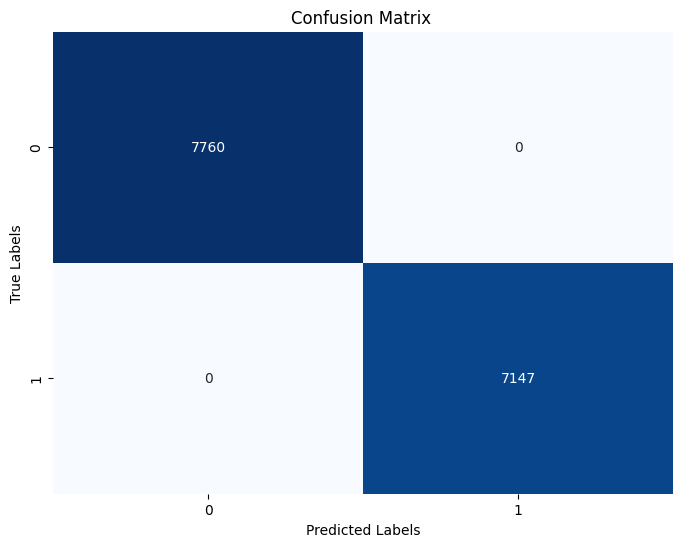

In [ ]:
con  = confusion_matrix(y_pred,y_test)
plt.figure(figsize=(8, 6))
sns.heatmap(con, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix ')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# ROC Curve of SVM

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


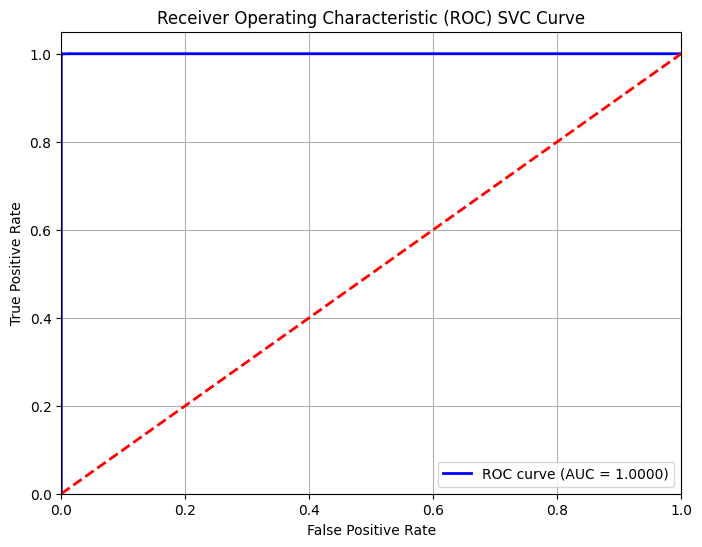

In [ ]:
# Generate ROC curve
X_test_imputed = pipeline.named_steps['imputer'].transform(X_test)

pipeline.set_params(svc__probability=True)

pipeline.fit(X_train, y_train)

# Now you should be able to generate probabilities
y_pred_prob = pipeline.predict_proba(X_test_imputed)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) SVC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Decision Tree Classifier

In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier

# Create an imputer to replace missing values with the mean of each column
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on your training data and transform both training and test data
X_train_imputed = imputer.fit_transform(X_train)
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train_imputed, y_train)

DecisionTreeClassifier(random_state=42)

# Model Evaluation

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

# Transform the test data using the same imputer fitted on the training data
X_test_imputed = imputer.transform(X_test)

# Predict on the imputed test data
y_pred = dtc.predict(X_test_imputed)

# Evaluation
acc_dtc=accuracy_score(y_pred,y_test)
print("Accuracy:",acc_dtc)
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SimpleImputer was fitted without feature names
  warnings.warn(


Accuracy: 0.9999361552703824
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8565
           1       1.00      1.00      1.00      7098

    accuracy                           1.00     15663
   macro avg       1.00      1.00      1.00     15663
weighted avg       1.00      1.00      1.00     15663



# Confusion Matrix

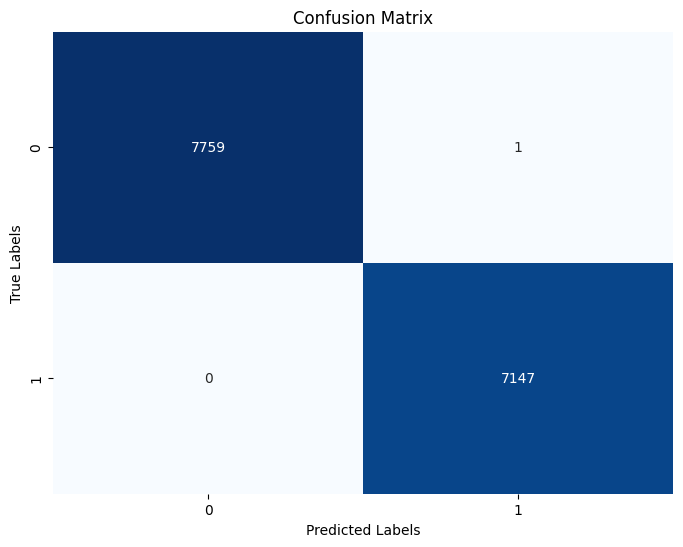

In [ ]:
con = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(con, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# ROC Curve of Decision Tree Classifier

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SimpleImputer was fitted without feature names
  warnings.warn(


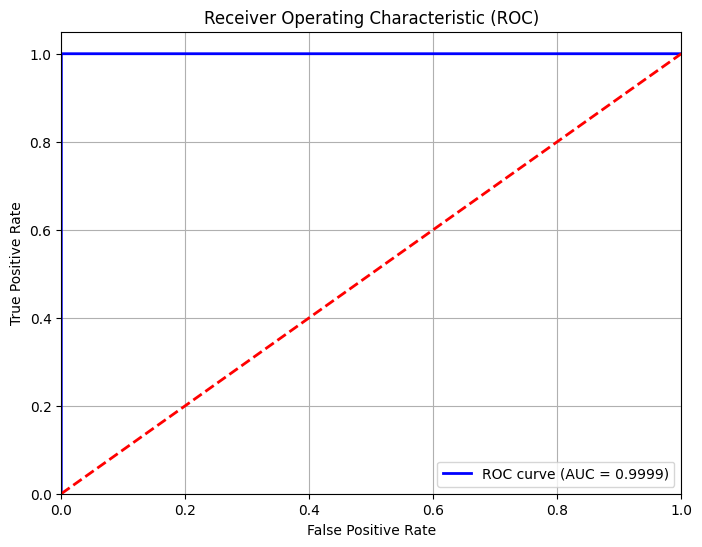

In [ ]:
# Generate ROC curve
X_test_imputed = imputer.transform(X_test)
y_pred_prob =dtc.predict_proba(X_test_imputed)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Naive Bayes Model

In [ ]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Impute missing values using SimpleImputer
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean') # or 'median', or other strategies
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Define the model
nb = GaussianNB()

# Set up the parameter grid
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4]
}

# Set up Grid Search with cross-validation
grid_search = GridSearchCV(estimator=nb, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the model
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05,
                                           0.0001]},
             scoring='accuracy')

# Model Evaluation

In [ ]:
# Best parameters found by Grid Search
print(f"Best parameters: {grid_search.best_params_}")

# Best estimator
best_nb = grid_search.best_estimator_

# Evaluate the model with the test data
y_pred = best_nb.predict(X_test)

Best parameters: {'var_smoothing': 1e-07}


In [ ]:
acc_nb=accuracy_score(y_pred,y_test)
print("Accuracy:",acc_nb)
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

Accuracy: 0.9996645871067283
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7760
           1       1.00      1.00      1.00      7147

    accuracy                           1.00     14907
   macro avg       1.00      1.00      1.00     14907
weighted avg       1.00      1.00      1.00     14907



# Confusion Matrix

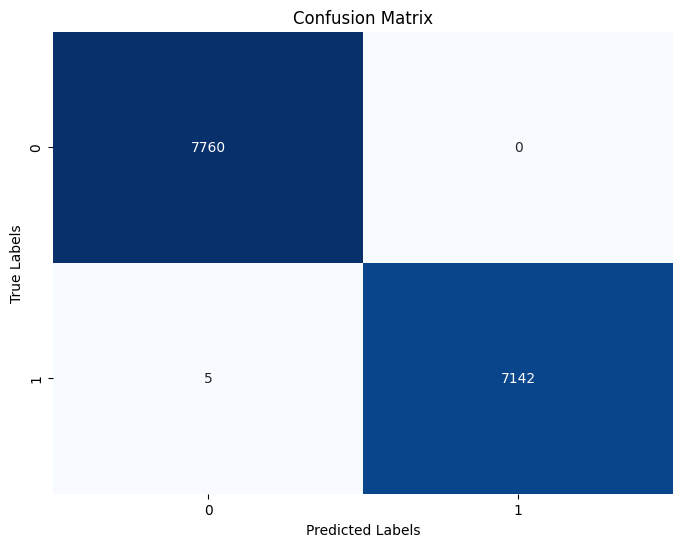

In [ ]:
con = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(con, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# ROC Curve of Naive Bayes

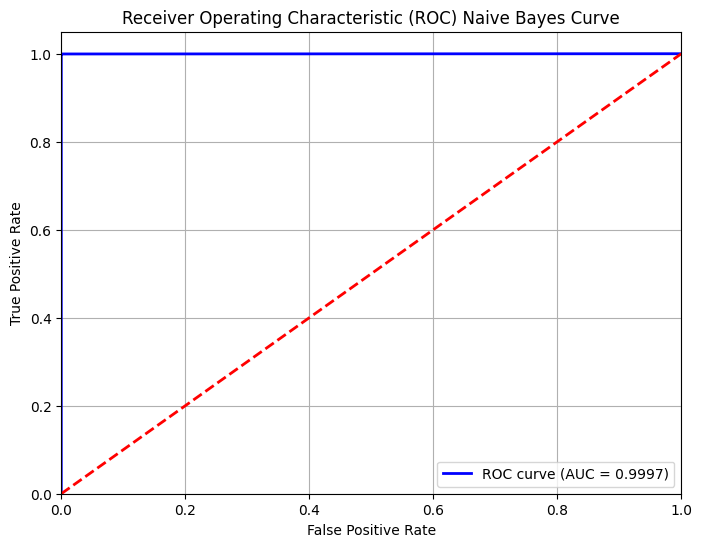

In [ ]:
# Impute missing values using SimpleImputer
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Define the model
nb = GaussianNB()

# Fit the Naive Bayes model to the training data
nb.fit(X_train, y_train)

# Generate ROC curve
X_test_imputed = imputer.transform(X_test)
y_pred_prob =nb.predict_proba(X_test_imputed)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Naive Bayes Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Learning Curve of Naive Bayes

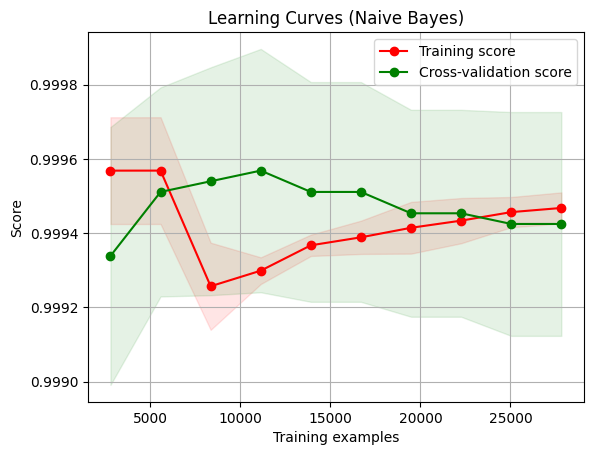

In [ ]:
# Plot learning curves
def plot_learning_curve(estimator, title, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)):
    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='accuracy')

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

title = "Learning Curves (Naive Bayes)"
plot_learning_curve(nb, title, X_train, y_train)

plt.show()

# GradientBoostingClassifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
# Impute missing values in X_train again before fitting the Gradient Boosting model
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)

# Now fit the Gradient Boosting model
gbc.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.9, max_depth=5)

In [ ]:
# Train the model
gbc.fit(X_train, y_train)

# Impute missing values in X_test before prediction
X_test_imputed = imputer.transform(X_test)

# Evaluate the model using the imputed X_test
y_pred = gbc.predict(X_test_imputed)

In [ ]:
accuracy_gb = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy_gb}")
print(f"Classification Report:\n{report}")

Accuracy: 0.9999361552703824
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8565
           1       1.00      1.00      1.00      7098

    accuracy                           1.00     15663
   macro avg       1.00      1.00      1.00     15663
weighted avg       1.00      1.00      1.00     15663



# Confusion Matrix

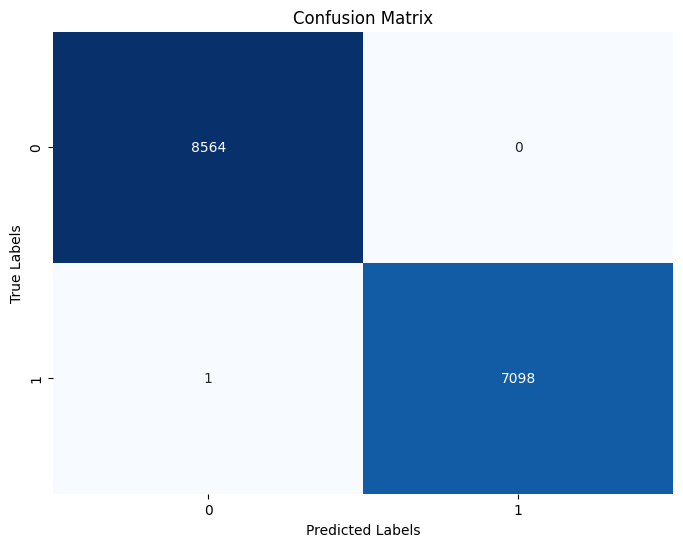

In [ ]:
con  = confusion_matrix(y_pred,y_test)
plt.figure(figsize=(8, 6))
sns.heatmap(con, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

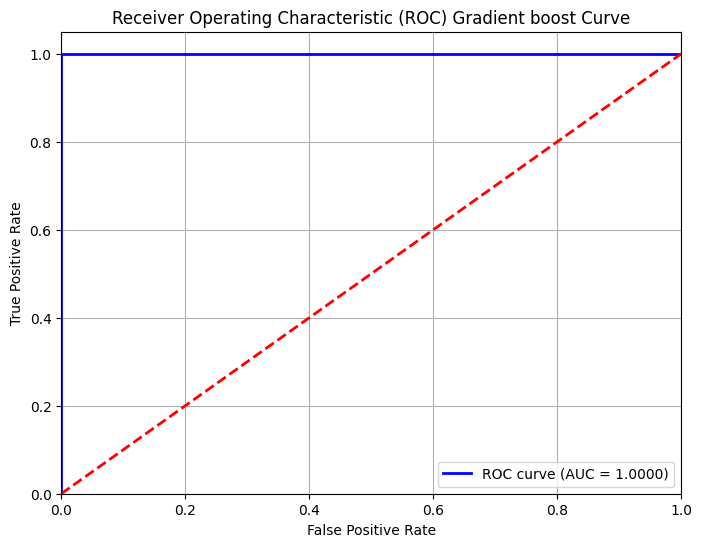

In [ ]:
# Generate ROC curve
X_test_imputed = imputer.transform(X_test)
y_pred_prob =gbc.predict_proba(X_test_imputed)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Gradient boost Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Artificial Neural Network Model

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Epoch 1/5
435/435 [==============================] - 6s 12ms/step - loss: 0.0153 - accuracy: 0.9964 - val_loss: 2.7500e-04 - val_accuracy: 0.9999
Epoch 2/5
435/435 [==============================] - 5s 11ms/step - loss: 2.6186e-04 - accuracy: 1.0000 - val_loss: 1.5049e-06 - val_accuracy: 1.0000
Epoch 3/5
435/435 [==============================] - 3s 8ms/step - loss: 0.0063 - accuracy: 0.9998 - val_loss: 1.6521e-06 - val_accuracy: 1.0000
Epoch 4/5
435/435 [==============================] - 3s 8ms/step - loss: 0.0039 - accuracy: 0.9999 - val_loss: 1.1779e-07 - val_accuracy: 1.0000
Epoch 5/5
466/466 [==============================] - 1s 2ms/step - loss: 0.0027 - accuracy: 0.9998
Test accuracy: 0.9997987747192383


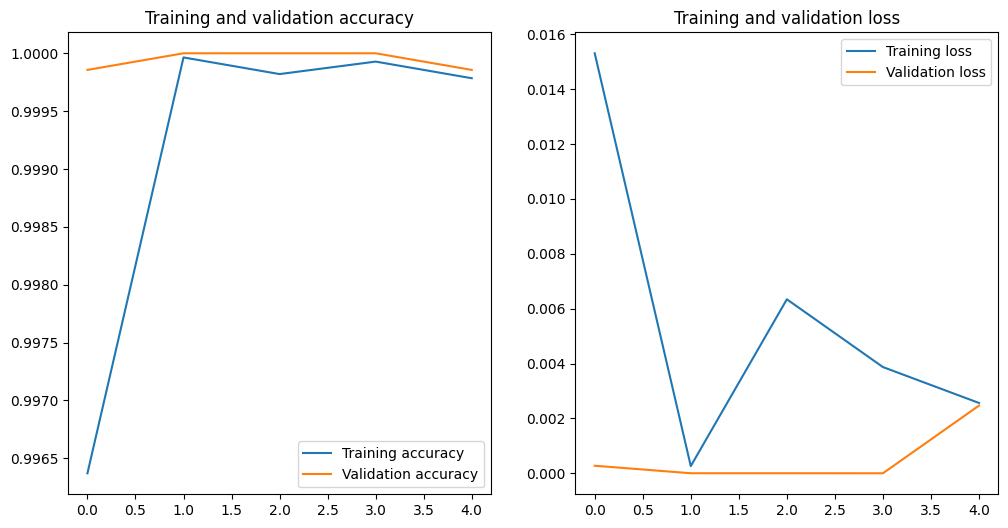

In [ ]:
# Define the ANN model
model = Sequential([
    Dense(512, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(len(set(y)), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc}")

# Plotting training & validation accuracy and loss
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, label='Training accuracy')
plt.plot(epochs, val_acc, label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# All Accuracy Models

In [ ]:
print('Logistic Regression Accuracy:',round(acc_lg*100,2))
print('K-Nearest Neighbour Accuracy:',round(acc_knn*100,2))
print('Decision Tree Classifier Accuracy:',round(acc_dtc*100,2))
print('Naive Bayes Accuracy:',round(acc_nb*100,2))
print('Support Vector Accuracy:',round(acc_SVC*100,2))
print('Gradient Boosting Accuracy:',round(accuracy_gb*100,2))
print('Neural Network Accuracy:',round(test_acc*100,2))

Logistic Regression Accuracy: 98.16
K-Nearest Neighbour Accuracy: 99.51
Decision Tree Classifier Accuracy: 99.99
Naive Bayes Accuracy: 99.97
Support Vector Accuracy: 99.97
Gradient Boosting Accuracy: 99.99
Neural Network Accuracy: 99.98


# Decision Tree classifier and Gradient Boost has both Highest Accuracy=99.99